## Question 3a
For each year: Can we identify trends or patterns in specific neighbourhoods (e.g. certain neighbourhoods seeing an increase or decrease in crime)?

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [5]:
# Read in CSV as a DataFrame and inspect
mci_all = pd.read_csv('../resources/mci_no_duplicates_2018_20_22.csv')
mci_all.head()

_id EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE  REPORT_YEAR REPORT_MONTH  \
0  134022     GO-20181532  2018-01-01  2018-01-01         2018      January   
1  134023     GO-20184352  2018-01-01  2018-01-01         2018      January   
2  134024     GO-20184878  2018-01-01  2018-01-01         2018      January   
3  134025     GO-20183609  2018-01-01  2018-01-01         2018      January   
4  134026     GO-20184674  2018-01-01  2018-01-01         2018      January   

   REPORT_DAY  REPORT_DOY  REPORT_DOW  REPORT_HOUR  ...  \
0           1           1  Monday              4.0  ...   
1           1           1  Monday             18.0  ...   
2           1           1  Monday             21.0  ...   
3           1           1  Monday             15.0  ...   
4           1           1  Monday             20.0  ...   

                                       LOCATION_TYPE PREMISES_TYPE  UCR_CODE  \
0  Other Commercial / Corporate Places (For Profi...    Commercial      1430   
1                   Apartment (Rooming House, Condo)     Apartment      1430   
2                   Apartment (Rooming House, Condo)     Apartment      1420   
3  Streets, Roads, Highways (Bicycle Path, Privat...       Outside      2130   
4                                 Convenience Stores    Commercial      1610   

   UCR_EXT              OFFENCE  MCI_CATEGORY HOOD_158    NEIGHBOURHOOD_158  \
0      100              Assault       Assault      168  Downtown Yonge East   
1      100              Assault       Assault      150    Fenside-Parkwoods   
2      100  Assault With Weapon       Assault      106   Humewood-Cedarvale   
3      210           Theft Over    Theft Over       95                Annex   
4      210   Robbery - Business       Robbery      123           Cliffcrest   

  HOOD_140           NEIGHBOURHOOD_140  
0       75  Church-Yonge Corridor (75)  
1       45      Parkwoods-Donalda (45)  
2      106    Humewood-Cedarvale (106)  
3       95                  Annex (95)  
4      123            Cliffcrest (123)  

[5 rows x 27 columns]

In [6]:
#Drop unncessary rows
mci_columns = mci_all[['EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'OCC_MONTH', 'OCC_YEAR', 'LOCATION_TYPE', 'PREMISES_TYPE', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158']]
mci_columns.head()

EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE OCC_MONTH  OCC_YEAR  \
0     GO-20181532  2018-01-01  2018-01-01   January    2018.0   
1     GO-20184352  2018-01-01  2018-01-01   January    2018.0   
2     GO-20184878  2018-01-01  2018-01-01   January    2018.0   
3     GO-20183609  2018-01-01  2018-01-01   January    2018.0   
4     GO-20184674  2018-01-01  2018-01-01   January    2018.0   

                                       LOCATION_TYPE PREMISES_TYPE  \
0  Other Commercial / Corporate Places (For Profi...    Commercial   
1                   Apartment (Rooming House, Condo)     Apartment   
2                   Apartment (Rooming House, Condo)     Apartment   
3  Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
4                                 Convenience Stores    Commercial   

               OFFENCE MCI_CATEGORY HOOD_158    NEIGHBOURHOOD_158  
0              Assault      Assault      168  Downtown Yonge East  
1              Assault      Assault      150    Fenside-Parkwoods  
2  Assault With Weapon      Assault      106   Humewood-Cedarvale  
3           Theft Over   Theft Over       95                Annex  
4   Robbery - Business      Robbery      123           Cliffcrest

In [7]:
#Check dataframe dtypes
mci_columns.dtypes

EVENT_UNIQUE_ID       object
REPORT_DATE           object
OCC_DATE              object
OCC_MONTH             object
OCC_YEAR             float64
LOCATION_TYPE         object
PREMISES_TYPE         object
OFFENCE               object
MCI_CATEGORY          object
HOOD_158              object
NEIGHBOURHOOD_158     object
dtype: object

In [8]:
#Convert OCC_YEAR column from dtype float64 to int64 then check dtypes again
mci_columns['OCC_YEAR'] = mci_columns['OCC_YEAR'].astype('int64')
mci_columns.dtypes

/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_51751/3081604221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mci_columns['OCC_YEAR'] = mci_columns['OCC_YEAR'].astype('int64')


EVENT_UNIQUE_ID      object
REPORT_DATE          object
OCC_DATE             object
OCC_MONTH            object
OCC_YEAR              int64
LOCATION_TYPE        object
PREMISES_TYPE        object
OFFENCE              object
MCI_CATEGORY         object
HOOD_158             object
NEIGHBOURHOOD_158    object
dtype: object

In [9]:
#Check for any null values
mci_columns.count()

EVENT_UNIQUE_ID      104454
REPORT_DATE          104454
OCC_DATE             104454
OCC_MONTH            104454
OCC_YEAR             104454
LOCATION_TYPE        104454
PREMISES_TYPE        104454
OFFENCE              104454
MCI_CATEGORY         104454
HOOD_158             104454
NEIGHBOURHOOD_158    104454
dtype: int64

In [10]:
#Separate dataframe into individual dataframes for each year (2018, 2020 and 2022)
mci_2018 = mci_columns.loc[mci_columns['OCC_YEAR'] == 2018]
mci_2020 = mci_columns.loc[mci_columns['OCC_YEAR'] == 2020]
mci_2022 = mci_columns.loc[mci_columns['OCC_YEAR'] == 2022]

## 2018

In [11]:
#Inspect dataframe for 2018
mci_2018.head()

EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE OCC_MONTH  OCC_YEAR  \
0     GO-20181532  2018-01-01  2018-01-01   January      2018   
1     GO-20184352  2018-01-01  2018-01-01   January      2018   
2     GO-20184878  2018-01-01  2018-01-01   January      2018   
3     GO-20183609  2018-01-01  2018-01-01   January      2018   
4     GO-20184674  2018-01-01  2018-01-01   January      2018   

                                       LOCATION_TYPE PREMISES_TYPE  \
0  Other Commercial / Corporate Places (For Profi...    Commercial   
1                   Apartment (Rooming House, Condo)     Apartment   
2                   Apartment (Rooming House, Condo)     Apartment   
3  Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
4                                 Convenience Stores    Commercial   

               OFFENCE MCI_CATEGORY HOOD_158    NEIGHBOURHOOD_158  
0              Assault      Assault      168  Downtown Yonge East  
1              Assault      Assault      150    Fenside-Parkwoods  
2  Assault With Weapon      Assault      106   Humewood-Cedarvale  
3           Theft Over   Theft Over       95                Annex  
4   Robbery - Business      Robbery      123           Cliffcrest

In [10]:
#Check the sum of offences reported in each neighbourhood
hood_offence_total = mci_2018.groupby('NEIGHBOURHOOD_158')['EVENT_UNIQUE_ID'].count()
hood_offence_total 

NEIGHBOURHOOD_158
Agincourt North                 226
Agincourt South-Malvern West    271
Alderwood                        81
Annex                           520
Avondale                        105
                               ... 
Yonge-Doris                     129
Yonge-Eglinton                  115
Yonge-St.Clair                   64
York University Heights         640
Yorkdale-Glen Park              324
Name: EVENT_UNIQUE_ID, Length: 159, dtype: int64

In [11]:
#Sort by highest to lowest
hood_sorted = hood_offence_total.sort_values(ascending = False)
hood_sorted

NEIGHBOURHOOD_158
West Humber-Clairville    1041
Moss Park                  912
Downtown Yonge East        778
Kensington-Chinatown       750
Yonge-Bay Corridor         741
                          ... 
Guildwood                   64
Yonge-St.Clair              64
Woodbine-Lumsden            63
Lambton Baby Point          54
Maple Leaf                  53
Name: EVENT_UNIQUE_ID, Length: 159, dtype: int64

In [12]:
#Get top 5 and bottom 5 neighbourhoods by sum of offences
top_5_hoods = hood_sorted.head()
bottom_5_hoods = hood_sorted.tail()
top_5_hoods

NEIGHBOURHOOD_158
West Humber-Clairville    1041
Moss Park                  912
Downtown Yonge East        778
Kensington-Chinatown       750
Yonge-Bay Corridor         741
Name: EVENT_UNIQUE_ID, dtype: int64

In [13]:
#From the bottom 5 neighbourhood series, extract a list of each neighbourhood name using a for loop
bottom_5_names = bottom_5_hoods.index
bottom_neighbourhoods = []
for index in range(0, len(bottom_5_names)):
   bottom_neighbourhoods.append(bottom_5_names[index])
bottom_neighbourhoods

['Guildwood',
 'Yonge-St.Clair',
 'Woodbine-Lumsden',
 'Lambton Baby Point',
 'Maple Leaf']

## Neighbourhoods with the highest number of offences
We separated each of the top 5 neighbourhoods into their own dataframes to further analyze crime indicators on a neighbourhood level.

In [12]:
#Separate mci_2018 dataframe into 5 dataframes for each of the top 5 neighbourhoods
whc_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'West Humber-Clairville']
mp_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'Moss Park']
dye_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'Downtown Yonge East']
kc_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'Kensington-Chinatown']
ybc_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'Yonge-Bay Corridor']

### Neighbourhood 1: West Humber-Clairville

In [15]:
#Inspect WHC dataframe
whc_hood

EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE OCC_MONTH  OCC_YEAR  \
66        GO-20182608  2018-01-01  2018-01-01   January      2018   
98        GO-20189906  2018-01-02  2018-01-02   January      2018   
182      GO-201817980  2018-01-03  2018-01-03   January      2018   
221      GO-201813380  2018-01-03  2018-01-02   January      2018   
249      GO-201821144  2018-01-04  2018-01-04   January      2018   
...               ...         ...         ...       ...       ...   
34612  GO-20201985462  2020-10-14  2018-10-04   October      2018   
34666   GO-2021597598  2021-04-01  2018-01-01   January      2018   
34705  GO-20211976842  2021-10-14  2018-01-01   January      2018   
34706  GO-20211976842  2021-10-14  2018-01-01   January      2018   
34726   GO-2022354202  2022-02-23  2018-12-20  December      2018   

                                           LOCATION_TYPE PREMISES_TYPE  \
66     Parking Lots (Apt., Commercial Or Non-Commercial)       Outside   
98     Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
182    Other Commercial / Corporate Places (For Profi...    Commercial   
221    Parking Lots (Apt., Commercial Or Non-Commercial)       Outside   
249                     Apartment (Rooming House, Condo)     Apartment   
...                                                  ...           ...   
34612  Single Home, House (Attach Garage, Cottage, Mo...         House   
34666       Construction Site (Warehouse, Trailer, Shed)    Commercial   
34705  Single Home, House (Attach Garage, Cottage, Mo...         House   
34706  Single Home, House (Attach Garage, Cottage, Mo...         House   
34726  Single Home, House (Attach Garage, Cottage, Mo...         House   

                      OFFENCE MCI_CATEGORY HOOD_158       NEIGHBOURHOOD_158  
66                 Theft Over   Theft Over        1  West Humber-Clairville  
98          Robbery - Mugging      Robbery        1  West Humber-Clairville  
182                   Assault      Assault        1  West Humber-Clairville  
221    Theft Of Motor Vehicle   Auto Theft        1  West Humber-Clairville  
249                   Assault      Assault        1  West Humber-Clairville  
...                       ...          ...      ...                     ...  
34612                 Assault      Assault        1  West Humber-Clairville  
34666              Theft Over   Theft Over        1  West Humber-Clairville  
34705     Assault With Weapon      Assault        1  West Humber-Clairville  
34706                 Assault      Assault        1  West Humber-Clairville  
34726                 Assault      Assault        1  West Humber-Clairville  

[1041 rows x 11 columns]

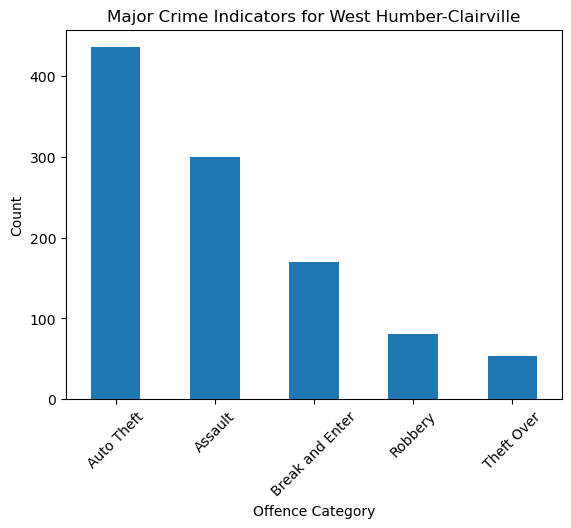

In [15]:
#Define a function called mci_category to get the count of offences 
#per MCI category by neighbourhood and create a bar chart
def mci_category(df, hood):
    mci_category = df.groupby('MCI_CATEGORY')['EVENT_UNIQUE_ID'].count()
    mci_category.sort_values(ascending = False).plot(kind = 'bar')
    plt.xticks(rotation = 45)
    plt.ylabel('Count')
    plt.xlabel('Offence Category')
    plt.title(f'Major Crime Indicators for {hood}')
    plt.show()

#Call the function
mci_category(whc_hood, 'West Humber-Clairville')

In [147]:
#Define function to get the percentage of one offence out of total offences in neighbourhood
def offence_pct(df, offence, hood):
    off_pct = (len(df.loc[df['MCI_CATEGORY'] == f'{offence}']) / len(df)) * 100
    print(f'{offence} offences accounted for {round(off_pct, 2)}% of all offences in {hood} in 2018.')

#Call the function for auto theft and assault
offence_pct(whc_hood, 'Auto Theft', 'West Humber-Clairville')
offence_pct(whc_hood, 'Assault', 'West Humber-Clairville')

Auto Theft offences accounted for 41.88% of all offences in West Humber-Clairville in 2018.
Assault offences accounted for 28.82% of all offences in West Humber-Clairville in 2018.


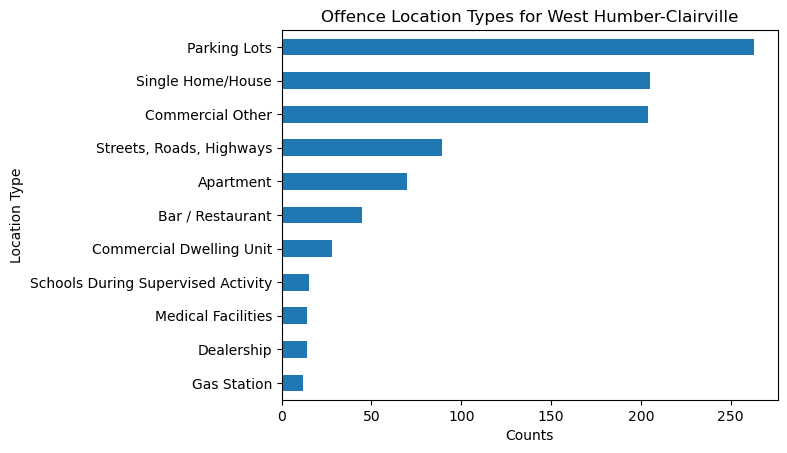

In [111]:
#Define a function to get the location types for offences in each neighbourhood
def location_types(df, hood):
   hood_location = df.groupby('LOCATION_TYPE').count()
   if len(hood_location.loc[hood_location['EVENT_UNIQUE_ID'] >= 10]) > 5:
      hood_location_occ = hood_location.loc[hood_location['EVENT_UNIQUE_ID'] >= 10]
      hood_location_final = hood_location_occ.rename(index = {'Apartment (Rooming House, Condo)': 'Apartment', 
                                   'Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)': 'Commercial Dwelling Unit', 
                                   'Dealership (Car, Motorcycle, Marine, Trailer, Etc.)': 'Dealership', 'Gas Station (Self, Full, Attached Convenience)': 'Gas Station',
                                   'Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)': 'Medical Facilities', 
                                   'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg': 'Commercial Other',
                                   'Parking Lots (Apt., Commercial Or Non-Commercial)': 'Parking Lots', 
                                   'Single Home, House (Attach Garage, Cottage, Mobile)': 'Single Home/House', 
                                   'Streets, Roads, Highways (Bicycle Path, Private Road)': 'Streets, Roads, Highways'})
      hood_location_final['EVENT_UNIQUE_ID'].sort_values().plot(kind = 'barh')
      plt.title(f'Offence Location Types for {hood}')
      plt.ylabel('Location Type')
      plt.xlabel('Counts')
      plt.show()
   else: 
      hood_location_final = hood_location.rename(index = {'Apartment (Rooming House, Condo)': 'Apartment', 
                                   'Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)': 'Commercial Dwelling Unit', 
                                   'Dealership (Car, Motorcycle, Marine, Trailer, Etc.)': 'Dealership', 'Gas Station (Self, Full, Attached Convenience)': 'Gas Station',
                                   'Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)': 'Medical Facilities', 
                                   'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg': 'Commercial Other',
                                   'Parking Lots (Apt., Commercial Or Non-Commercial)': 'Parking Lots', 
                                   'Single Home, House (Attach Garage, Cottage, Mobile)': 'Single Home/House', 
                                   'Streets, Roads, Highways (Bicycle Path, Private Road)': 'Streets, Roads, Highways'})
      hood_location_final['EVENT_UNIQUE_ID'].sort_values().plot(kind = 'barh')
      plt.title(f'Offence Location Types for {hood}')
      plt.ylabel('Location Type')
      plt.xlabel('Counts')
      plt.show()

#Call the function   
location_types(whc_hood, 'West Humber-Clairville')

In [144]:
#Define function to get the percentage of one location type out of all locations
def location_pct(df, location, hood):
    location_pct = (len(df.loc[df['LOCATION_TYPE'] == f'{location}']) / len(df)) * 100
    print(f'Offences in {location} accounted for {round(location_pct, 2)}% of location types in {hood} in 2018.')

location_pct(whc_hood, 'Parking Lots (Apt., Commercial Or Non-Commercial)', 'West Humber-Clairville')
location_pct(whc_hood, 'Single Home, House (Attach Garage, Cottage, Mobile)', 'West Humber-Clairville')
location_pct(whc_hood, 'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg', 'West Humber-Clairville')

Offences in Parking Lots (Apt., Commercial Or Non-Commercial) accounted for 25.26% of location types in West Humber-Clairville in 2018.
Offences in Single Home, House (Attach Garage, Cottage, Mobile) accounted for 19.69% of location types in West Humber-Clairville in 2018.
Offences in Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg accounted for 19.6% of location types in West Humber-Clairville in 2018.


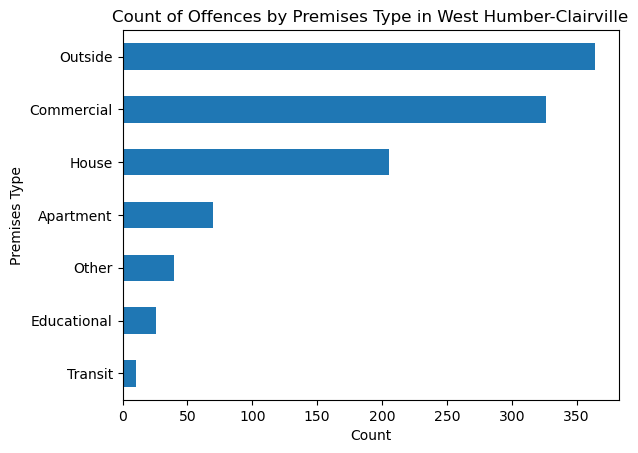

In [23]:
#Define a function to get the count of offences by premises type for each neighbourhood
def premises_type(df, hood):
    hood_premises = df.groupby('PREMISES_TYPE').count()
    hood_premises['EVENT_UNIQUE_ID'].sort_values(ascending = True).plot(kind = 'barh')
    plt.title(f'Count of Offences by Premises Type in {hood}')
    plt.ylabel('Premises Type')
    plt.xlabel('Count')
    plt.show()

#Call the function
premises_type(whc_hood, 'West Humber-Clairville')

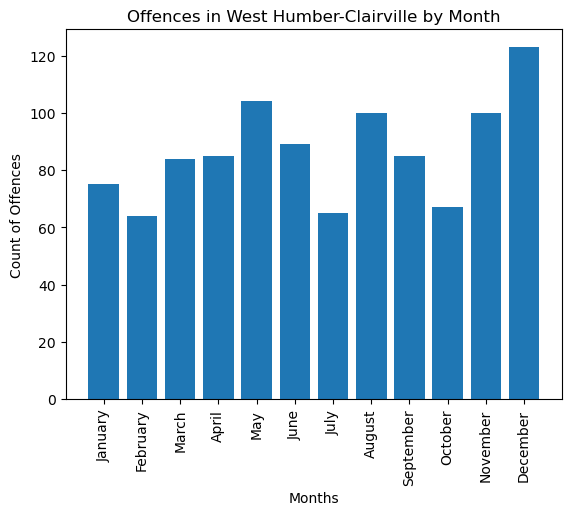

In [24]:
#Define a function to get the total count of offence categories by month for each neighbourhood
def monthly_offences(df, hood):
    df_copy = df.copy()
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    df_copy['OCC_MONTH'] = pd.Categorical(df_copy['OCC_MONTH'], categories = months, ordered = True)
    df_copy = df_copy.sort_values(by = 'OCC_MONTH')
    x_values = months
    y_values = df_copy.groupby('OCC_MONTH')['MCI_CATEGORY'].count()
    xticks_labels = months
    xtick_locations = [value for value in x_values]
    plt.bar(x_values, y_values)
    plt.xticks(xtick_locations, xticks_labels, rotation = 90)
    plt.title(f'Offences in {hood} by Month')
    plt.ylabel('Count of Offences')
    plt.xlabel('Months')
    plt.show()

#Call the function
monthly_offences(whc_hood, 'West Humber-Clairville')

In [145]:
#Define a function to get the percentage of offences in one month out of all months
def month_pct(df, month, hood):
    month_pct = (len(df.loc[df['OCC_MONTH'] == f'{month}']) / len(df)) * 100
    print(f'Offences in {month} accounted for {round(month_pct, 2)}% of all offences in {hood} in 2018.')

#Call the function to get the percentage for highest and lowest months
month_pct(whc_hood, 'December', 'West Humber-Clairville')
month_pct(whc_hood, 'May', 'West Humber-Clairville')
month_pct(whc_hood, 'August', 'West Humber-Clairville')
month_pct(whc_hood, 'February', 'West Humber-Clairville')
month_pct(whc_hood, 'July', 'West Humber-Clairville')
month_pct(whc_hood, 'October', 'West Humber-Clairville')

Offences in December accounted for 11.82% of all offences in West Humber-Clairville in 2018.
Offences in May accounted for 9.99% of all offences in West Humber-Clairville in 2018.
Offences in August accounted for 9.61% of all offences in West Humber-Clairville in 2018.
Offences in February accounted for 6.15% of all offences in West Humber-Clairville in 2018.
Offences in July accounted for 6.24% of all offences in West Humber-Clairville in 2018.
Offences in October accounted for 6.44% of all offences in West Humber-Clairville in 2018.


### What is the most common location type for auto theft offences?

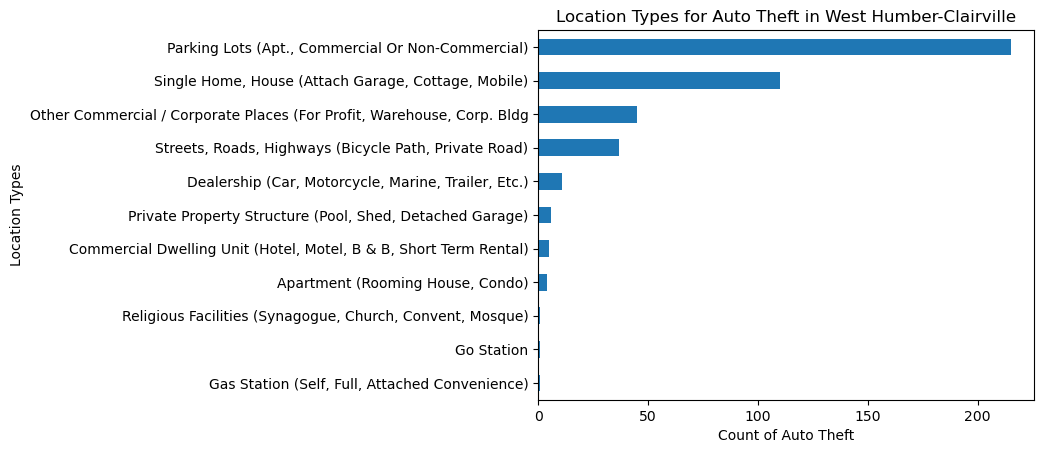

In [26]:
#Define a function to get the location types for a specific MCI category
def off_location(df, offence, hood):
    offence_df = df.loc[df['MCI_CATEGORY'] == f'{offence}']
    offence_loc_df = offence_df.groupby('LOCATION_TYPE')['EVENT_UNIQUE_ID'].count()
    offence_loc_df.sort_values().plot(kind = 'barh')
    plt.title(f'Location Types for {offence} in {hood}')
    plt.ylabel('Location Types')
    plt.xlabel(f'Count of {offence}')
    plt.show()

#Call the function for whc_hood and Auto Theft
off_location(whc_hood, 'Auto Theft', 'West Humber-Clairville')

### What is the most common location type for assault offences?

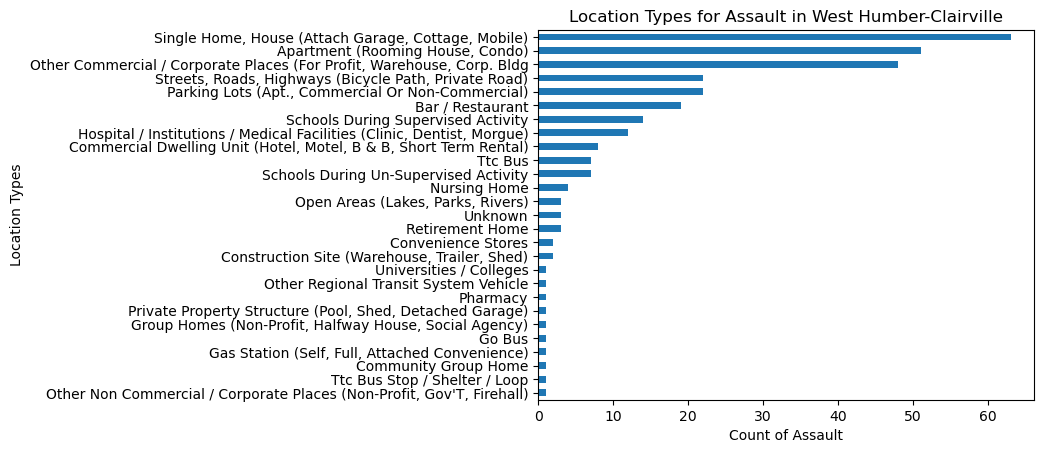

In [27]:
#Call the off_location function for whc_hood and Assault
off_location(whc_hood, 'Assault', 'West Humber-Clairville')

### Neighbourhood 2: Moss Park

In [129]:
#Inspect MP dataframe
mp_hood

EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE OCC_MONTH  OCC_YEAR  \
59        GO-20182061  2018-01-01  2018-01-01   January      2018   
110       GO-20187033  2018-01-02  2018-01-01   January      2018   
125      GO-201810218  2018-01-02  2018-01-02   January      2018   
145       GO-20186095  2018-01-02  2018-01-02   January      2018   
176      GO-201816901  2018-01-03  2018-01-03   January      2018   
...               ...         ...         ...       ...       ...   
34362  GO-20191105130  2019-06-15  2018-07-10      July      2018   
34363  GO-20191105130  2019-06-15  2018-07-10      July      2018   
34668   GO-2021634868  2021-04-07  2018-12-29  December      2018   
34700  GO-20211627033  2021-08-26  2018-10-01   October      2018   
34701  GO-20211627033  2021-08-26  2018-10-01   October      2018   

                                           LOCATION_TYPE PREMISES_TYPE  \
59     Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
110                                     Bar / Restaurant    Commercial   
125                           Homeless Shelter / Mission         Other   
145    Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
176    Private Property Structure (Pool, Shed, Detach...         Other   
...                                                  ...           ...   
34362                   Apartment (Rooming House, Condo)     Apartment   
34363                   Apartment (Rooming House, Condo)     Apartment   
34668                   Apartment (Rooming House, Condo)     Apartment   
34700                   Apartment (Rooming House, Condo)     Apartment   
34701                   Apartment (Rooming House, Condo)     Apartment   

                     OFFENCE     MCI_CATEGORY HOOD_158 NEIGHBOURHOOD_158  
59         Robbery - Mugging          Robbery       73         Moss Park  
110                      B&E  Break and Enter       73         Moss Park  
125    Assault Peace Officer          Assault       73         Moss Park  
145        Robbery - Mugging          Robbery       73         Moss Park  
176      Assault Bodily Harm          Assault       73         Moss Park  
...                      ...              ...      ...               ...  
34362                Assault          Assault       73         Moss Park  
34363    Assault With Weapon          Assault       73         Moss Park  
34668                Assault          Assault       73         Moss Park  
34700                Assault          Assault       73         Moss Park  
34701    Assault With Weapon          Assault       73         Moss Park  

[912 rows x 11 columns]

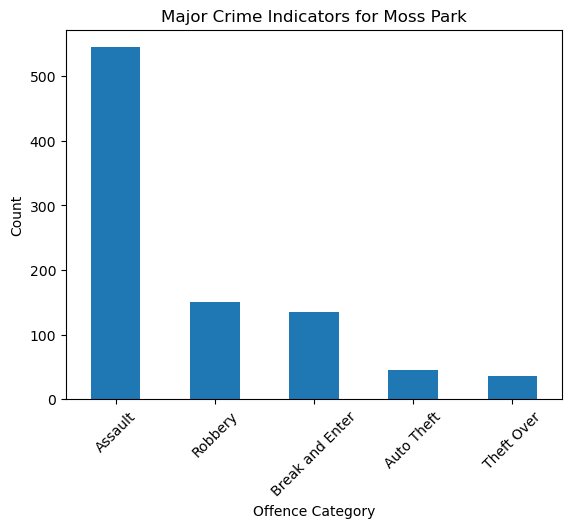

In [28]:
#Call mci_category function to get bar chart of MCI categories for Moss Park
mci_category(mp_hood, 'Moss Park')

In [148]:
#Call offence_pct function for assault
offence_pct(mp_hood, 'Assault', 'Moss Park')

Assault offences accounted for 59.76% of all offences in Moss Park in 2018.


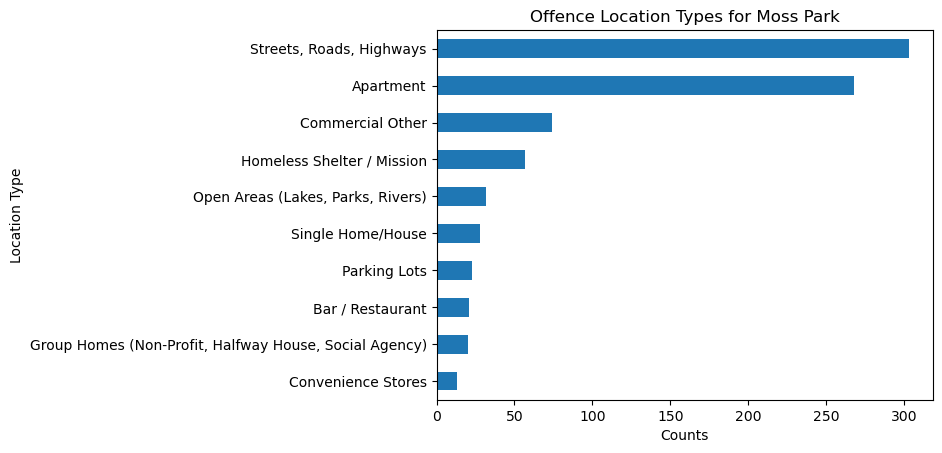

In [112]:
#Call the location_types function to get the count of offences by location type
location_types(mp_hood, 'Moss Park')

In [149]:
#Call location_pct function for streets/roads/highways and apartments
location_pct(mp_hood, 'Streets, Roads, Highways (Bicycle Path, Private Road)', 'Moss Park')
location_pct(mp_hood, 'Apartment (Rooming House, Condo)', 'Moss Park')

Offences in Streets, Roads, Highways (Bicycle Path, Private Road) accounted for 33.22% of location types in Moss Park in 2018.
Offences in Apartment (Rooming House, Condo) accounted for 29.39% of location types in Moss Park in 2018.


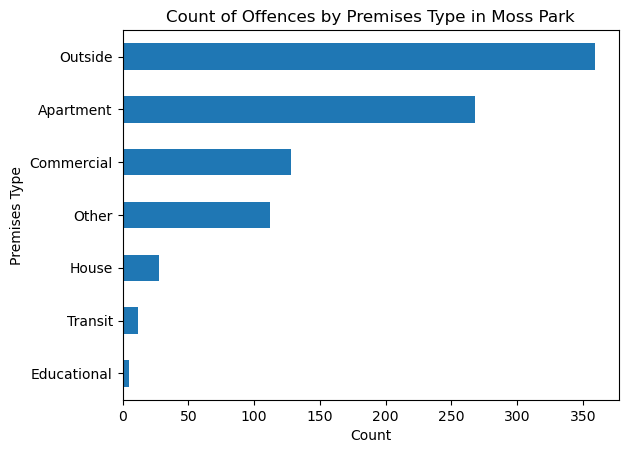

In [30]:
#Call the premises_type function to get the count of offences by premises
premises_type(mp_hood, 'Moss Park')

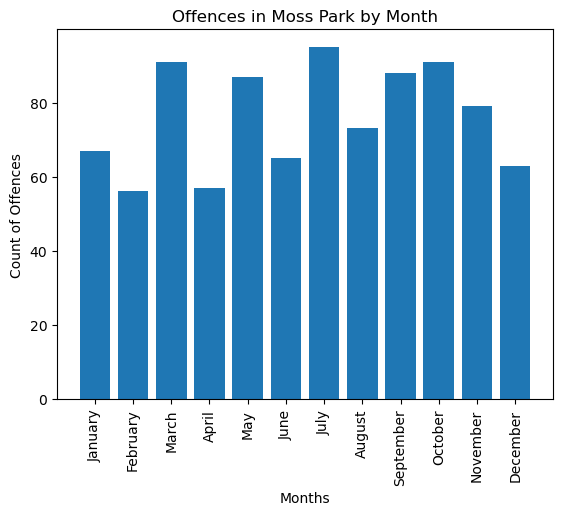

In [31]:
#Call the monthly_offences function to get the count of offences per month
monthly_offences(mp_hood, 'Moss Park')

In [150]:
#Call month_pct function on highest and lowest months
month_pct(mp_hood, 'March', 'Moss Park')
month_pct(mp_hood, 'May', 'Moss Park')
month_pct(mp_hood, 'July', 'Moss Park')
month_pct(mp_hood, 'September', 'Moss Park')
month_pct(mp_hood, 'October', 'Moss Park')
month_pct(mp_hood, 'February', 'Moss Park')
month_pct(mp_hood, 'April', 'Moss Park')

Offences in March accounted for 9.98% of all offences in Moss Park in 2018.
Offences in May accounted for 9.54% of all offences in Moss Park in 2018.
Offences in July accounted for 10.42% of all offences in Moss Park in 2018.
Offences in September accounted for 9.65% of all offences in Moss Park in 2018.
Offences in October accounted for 9.98% of all offences in Moss Park in 2018.
Offences in February accounted for 6.14% of all offences in Moss Park in 2018.
Offences in April accounted for 6.25% of all offences in Moss Park in 2018.


### Assault offences in Moss Park
Further analyze assault offences in Moss Park as they make up such a significant portion of offences in that neighbourhood.

What is the most common location type for assault offences?

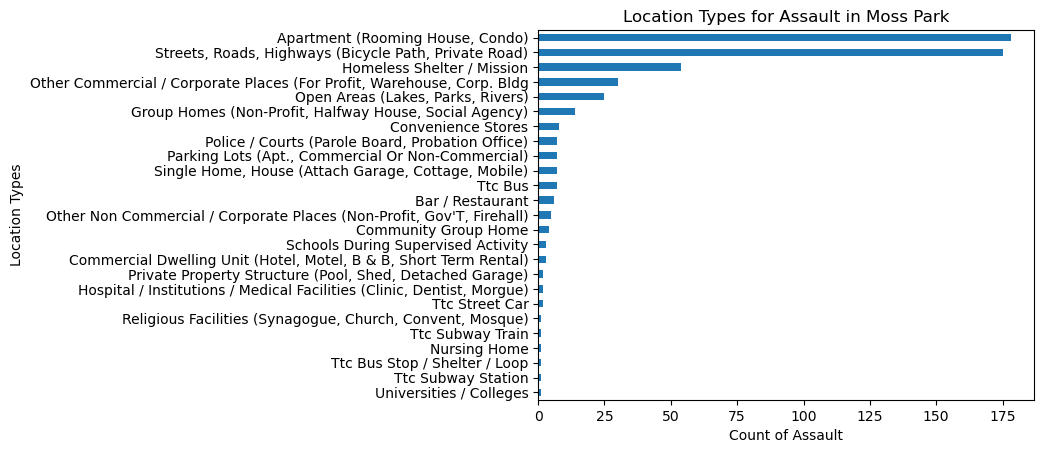

In [36]:
#Call the off_location function to get the location types for a specific offence
off_location(mp_hood, 'Assault', 'Moss Park')

When do assault offences occur most often throughout the year?

/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_51751/3731656909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_off_df['OCC_MONTH'] = pd.Categorical(one_off_df['OCC_MONTH'], categories = months, ordered = True)


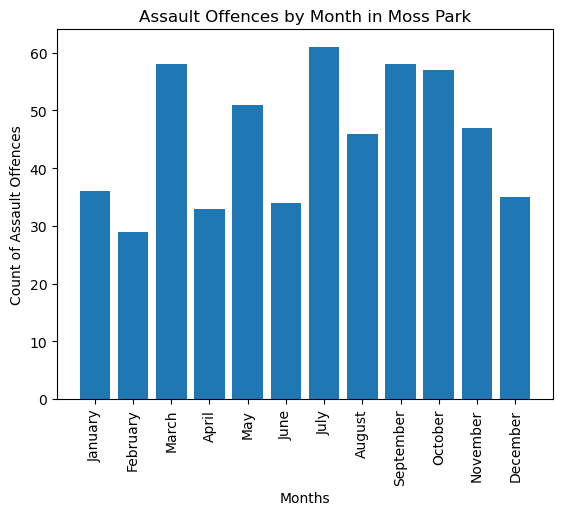

In [52]:
#Define a function to get the count of offences of a specific category by month
def one_offence_monthly(df, offence, hood):
    one_off_df = df.loc[df['MCI_CATEGORY'] == f'{offence}']
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    one_off_df['OCC_MONTH'] = pd.Categorical(one_off_df['OCC_MONTH'], categories = months, ordered = True)
    one_off_df = one_off_df.sort_values(by = 'OCC_MONTH')
    x_values = months
    y_values = one_off_df.groupby('OCC_MONTH')['MCI_CATEGORY'].count()
    xticks_labels = months
    xtick_locations = [value for value in x_values]
    plt.bar(x_values, y_values)
    plt.xticks(xtick_locations, xticks_labels, rotation = 90)
    plt.title(f'{offence} Offences by Month in {hood}')
    plt.ylabel(f'Count of {offence} Offences')
    plt.xlabel('Months')
    plt.show()

#Call the function
one_offence_monthly(mp_hood, 'Assault', 'Moss Park')

What percentage of the total offences in Moss Park come from assaults?

In [151]:
#Call offence_pct function for assault in Moss Park
offence_pct(mp_hood, 'Assault', 'Moss Park')

Assault offences accounted for 59.76% of all offences in Moss Park in 2018.


### Neighbourhood 3: Downtown Yonge East

In [13]:
#Inspect DYE dataframe
dye_hood

EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE  OCC_MONTH  OCC_YEAR  \
0         GO-20181532  2018-01-01  2018-01-01    January      2018   
184    GO-20189000231  2018-01-03  2018-01-03    January      2018   
227      GO-201813969  2018-01-03  2018-01-03    January      2018   
290      GO-201826810  2018-01-05  2018-01-01    January      2018   
298      GO-201829409  2018-01-05  2018-01-05    January      2018   
...               ...         ...         ...        ...       ...   
34332  GO-20191017052  2019-06-03  2018-12-01   December      2018   
34415  GO-20191465305  2019-08-03  2018-06-01       June      2018   
34457  GO-20191740031  2019-09-11  2018-07-30       July      2018   
34458  GO-20191740034  2019-09-11  2018-07-30       July      2018   
34523    GO-202085534  2020-01-13  2018-09-22  September      2018   

                                           LOCATION_TYPE PREMISES_TYPE  \
0      Other Commercial / Corporate Places (For Profi...    Commercial   
184    Commercial Dwelling Unit (Hotel, Motel, B & B,...    Commercial   
227    Other Non Commercial / Corporate Places (Non-P...         Other   
290    Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
298    Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
...                                                  ...           ...   
34332                   Apartment (Rooming House, Condo)     Apartment   
34415  Other Commercial / Corporate Places (For Profi...    Commercial   
34457  Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
34458  Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
34523  Hospital / Institutions / Medical Facilities (...         Other   

                      OFFENCE     MCI_CATEGORY HOOD_158    NEIGHBOURHOOD_158  
0                     Assault          Assault      168  Downtown Yonge East  
184                       B&E  Break and Enter      168  Downtown Yonge East  
227       Assault With Weapon          Assault      168  Downtown Yonge East  
290       Assault Bodily Harm          Assault      168  Downtown Yonge East  
298    Theft Of Motor Vehicle       Auto Theft      168  Downtown Yonge East  
...                       ...              ...      ...                  ...  
34332            B&E W'Intent  Break and Enter      168  Downtown Yonge East  
34415                 Assault          Assault      168  Downtown Yonge East  
34457                 Assault          Assault      168  Downtown Yonge East  
34458                 Assault          Assault      168  Downtown Yonge East  
34523     Assault With Weapon          Assault      168  Downtown Yonge East  

[778 rows x 11 columns]

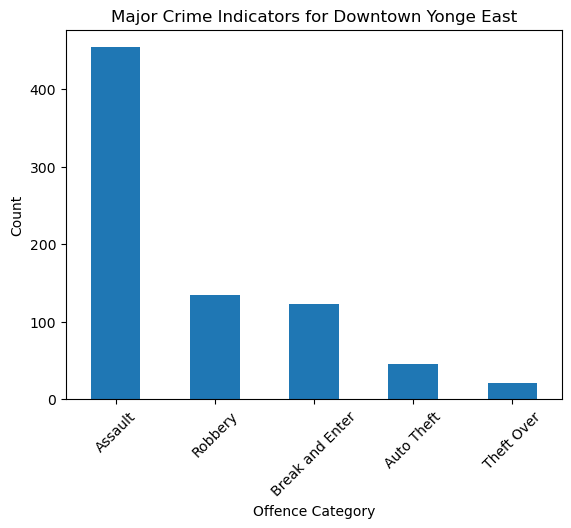

In [33]:
#Call mci_category function to get count of offences by category
mci_category(dye_hood, 'Downtown Yonge East')

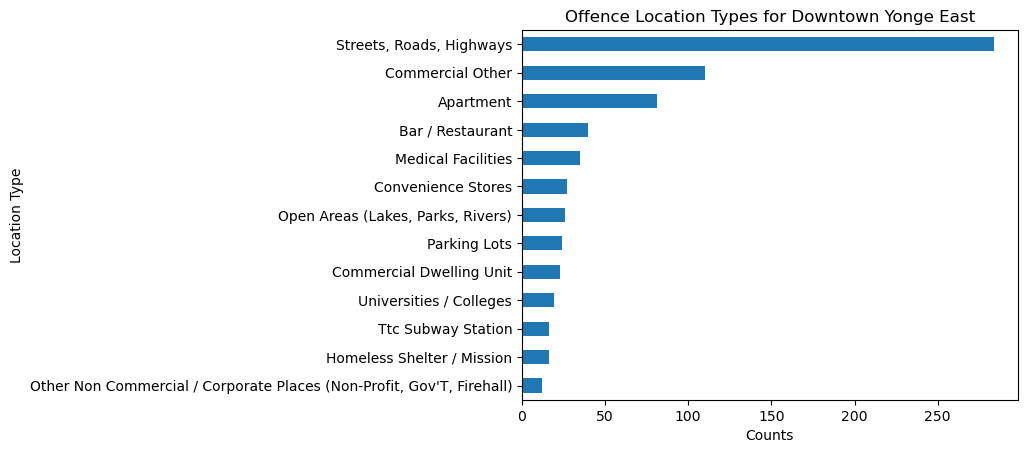

In [113]:
#Call location_types function to get count of offences by location type
location_types(dye_hood, 'Downtown Yonge East')

In [153]:
#Call location_pct function for streets/roads/highways
location_pct(dye_hood, 'Streets, Roads, Highways (Bicycle Path, Private Road)', 'Downtown Yonge East')

Offences in Streets, Roads, Highways (Bicycle Path, Private Road) accounted for 36.5% of location types in Downtown Yonge East in 2018.


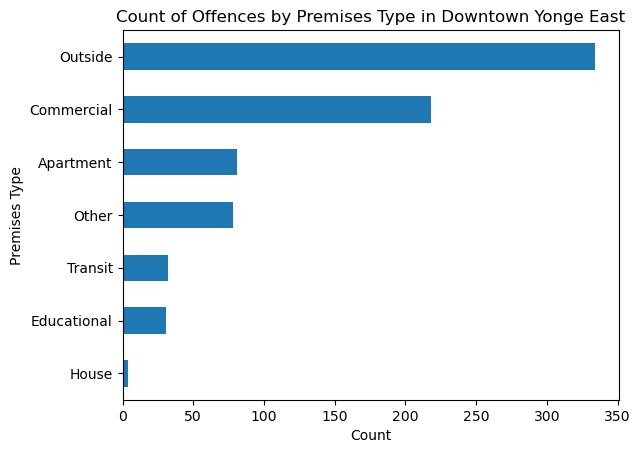

In [38]:
#Call premises_type function to get count of offences by premise type
premises_type(dye_hood, 'Downtown Yonge East')

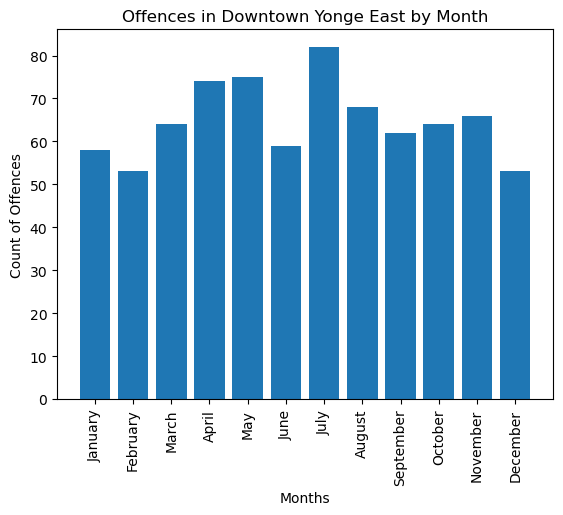

In [39]:
#Call monthly_offences function to get coutn of offence categories by month
monthly_offences(dye_hood, 'Downtown Yonge East')

In [154]:
#Call month_pct function for highest and lowest months
month_pct(dye_hood, 'April', 'Downtown Yonge East')
month_pct(dye_hood, 'May', 'Downtown Yonge East')
month_pct(dye_hood, 'July', 'Downtown Yonge East')
month_pct(dye_hood, 'February', 'Downtown Yonge East')
month_pct(dye_hood, 'December', 'Downtown Yonge East')

Offences in April accounted for 9.51% of all offences in Downtown Yonge East in 2018.
Offences in May accounted for 9.64% of all offences in Downtown Yonge East in 2018.
Offences in July accounted for 10.54% of all offences in Downtown Yonge East in 2018.
Offences in February accounted for 6.81% of all offences in Downtown Yonge East in 2018.
Offences in December accounted for 6.81% of all offences in Downtown Yonge East in 2018.


What is the most common location type for assault offences (as the greatest offence category in Downtown Yonge East)?

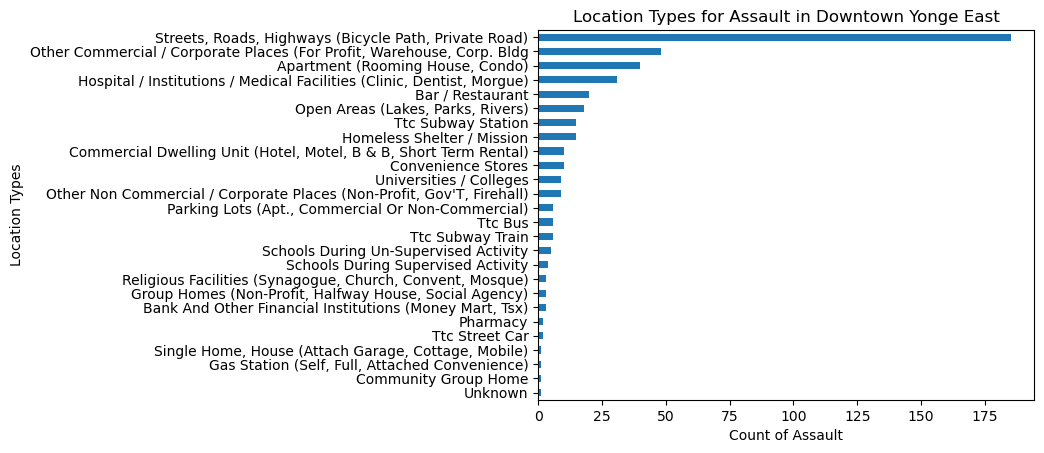

In [40]:
#Call the off_location function to get location types for assault offences
off_location(dye_hood, 'Assault', 'Downtown Yonge East')

In [51]:
#Call offence_pct function to get percentage of offences that are assault
offence_pct(dye_hood, 'Assault', 'Downtown Yonge East')

Assault offences accounted for 58.35% of all offences in Downtown Yonge East in 2018.


### Neighbourhood 4: Kensington-Chinatown

In [84]:
#Inspect dataframe
kc_hood

EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE  OCC_MONTH  OCC_YEAR  \
79        GO-20183245  2018-01-01  2018-01-01    January      2018   
91        GO-20187210  2018-01-02  2018-01-02    January      2018   
103       GO-20189480  2018-01-02  2018-01-02    January      2018   
105       GO-20186501  2018-01-02  2018-01-02    January      2018   
124       GO-20188870  2018-01-02  2018-01-02    January      2018   
...               ...         ...         ...        ...       ...   
34566  GO-20201062884  2020-06-09  2018-09-28  September      2018   
34579  GO-20201309064  2020-07-15  2018-05-01        May      2018   
34656   GO-2021500515  2021-03-18  2018-10-17    October      2018   
34657   GO-2021498108  2021-03-18  2018-10-25    October      2018   
34672   GO-2021813755  2021-05-03  2018-02-01   February      2018   

                                           LOCATION_TYPE PREMISES_TYPE  \
79     Single Home, House (Attach Garage, Cottage, Mo...         House   
91     Other Commercial / Corporate Places (For Profi...    Commercial   
103    Other Commercial / Corporate Places (For Profi...    Commercial   
105    Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
124    Other Commercial / Corporate Places (For Profi...    Commercial   
...                                                  ...           ...   
34566  Parking Lots (Apt., Commercial Or Non-Commercial)       Outside   
34579                   Apartment (Rooming House, Condo)     Apartment   
34656                                     Ttc Street Car       Transit   
34657                                            Ttc Bus       Transit   
34672  Hospital / Institutions / Medical Facilities (...         Other   

                             OFFENCE MCI_CATEGORY HOOD_158  \
79                           Assault      Assault       78   
91                           Assault      Assault       78   
103                          Assault      Assault       78   
105    Discharge Firearm With Intent      Assault       78   
124                          Assault      Assault       78   
...                              ...          ...      ...   
34566            Assault Bodily Harm      Assault       78   
34579                        Assault      Assault       78   
34656                        Assault      Assault       78   
34657                        Assault      Assault       78   
34672                        Assault      Assault       78   

          NEIGHBOURHOOD_158  
79     Kensington-Chinatown  
91     Kensington-Chinatown  
103    Kensington-Chinatown  
105    Kensington-Chinatown  
124    Kensington-Chinatown  
...                     ...  
34566  Kensington-Chinatown  
34579  Kensington-Chinatown  
34656  Kensington-Chinatown  
34657  Kensington-Chinatown  
34672  Kensington-Chinatown  

[750 rows x 11 columns]

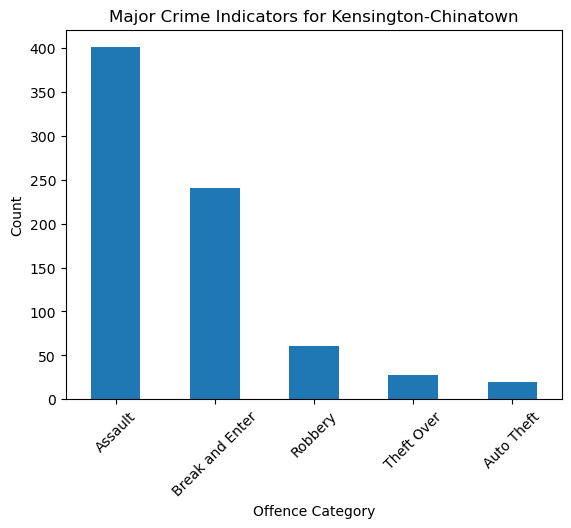

In [85]:
#Call mci_category function to get count of offences for KC
mci_category(kc_hood, 'Kensington-Chinatown')

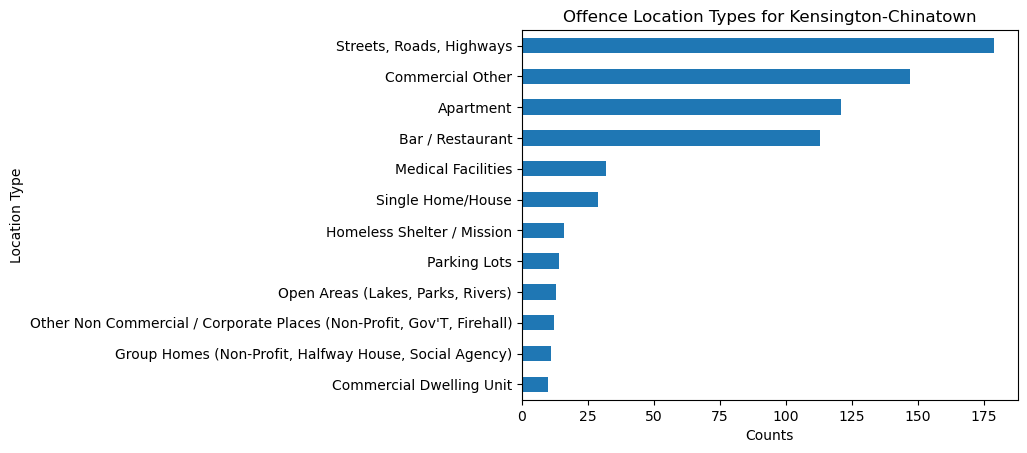

In [114]:
#Call the location_types function to get count of offences by location types
location_types(kc_hood, 'Kensington-Chinatown')

In [155]:
#Call location_pct for top 4 locations
location_pct(kc_hood, 'Streets, Roads, Highways (Bicycle Path, Private Road)', 'Kensington-Chinatown')
location_pct(kc_hood, 'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg', 'Kensington-Chinatown')
location_pct(kc_hood, 'Apartment (Rooming House, Condo)', 'Kensington-Chinatown')
location_pct(kc_hood, 'Bar / Restaurant', 'Kensington-Chinatown')


Offences in Streets, Roads, Highways (Bicycle Path, Private Road) accounted for 23.87% of location types in Kensington-Chinatown in 2018.
Offences in Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg accounted for 19.6% of location types in Kensington-Chinatown in 2018.
Offences in Apartment (Rooming House, Condo) accounted for 16.13% of location types in Kensington-Chinatown in 2018.
Offences in Bar / Restaurant accounted for 15.07% of location types in Kensington-Chinatown in 2018.


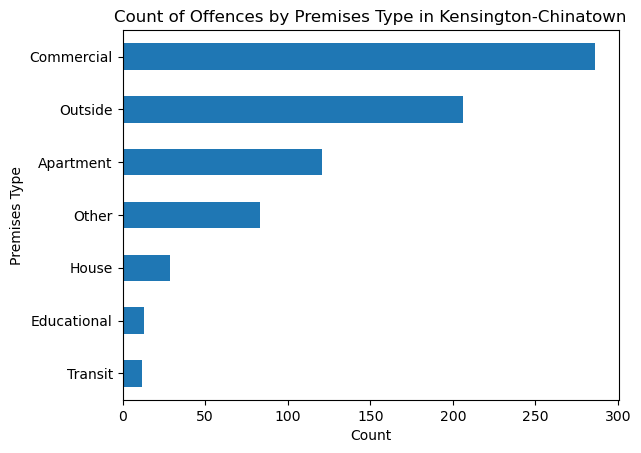

In [87]:
#Call premises_type function to get count of offences by premises
premises_type(kc_hood, 'Kensington-Chinatown')

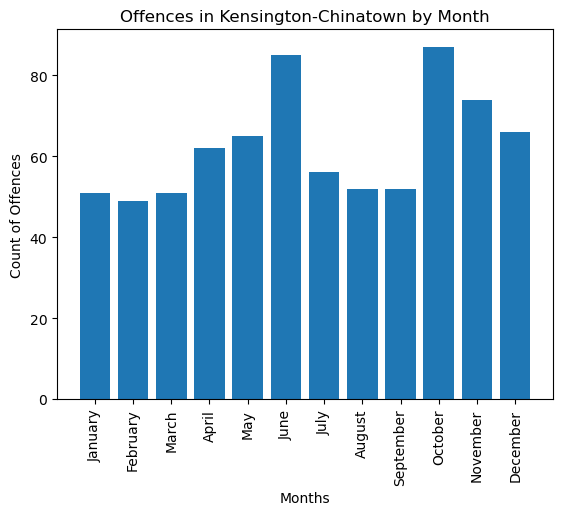

In [88]:
#Call monthly_offences function to get count of offence categories by month
monthly_offences(kc_hood, 'Kensington-Chinatown')

In [156]:
#Call month_pct function for highest and lowest months
month_pct(kc_hood, 'June', 'Kensington-Chinatown')
month_pct(kc_hood, 'October', 'Kensington-Chinatown')
month_pct(kc_hood, 'January', 'Kensington-Chinatown')
month_pct(kc_hood, 'February', 'Kensington-Chinatown')
month_pct(kc_hood, 'March', 'Kensington-Chinatown')

Offences in June accounted for 11.33% of all offences in Kensington-Chinatown in 2018.
Offences in October accounted for 11.6% of all offences in Kensington-Chinatown in 2018.
Offences in January accounted for 6.8% of all offences in Kensington-Chinatown in 2018.
Offences in February accounted for 6.53% of all offences in Kensington-Chinatown in 2018.
Offences in March accounted for 6.8% of all offences in Kensington-Chinatown in 2018.


In [89]:
#Call offence_pct function to get percentage of assault offences
offence_pct(kc_hood, 'Assault', 'Kensington-Chinatown')
#Call offence_pct function a second time to get percentage of break & enter offences
offence_pct(kc_hood, 'Break and Enter', 'Kensington-Chinatown')

Assault offences accounted for 53.47% of all offences in Kensington-Chinatown in 2018.
Break and Enter offences accounted for 32.13% of all offences in Kensington-Chinatown in 2018.


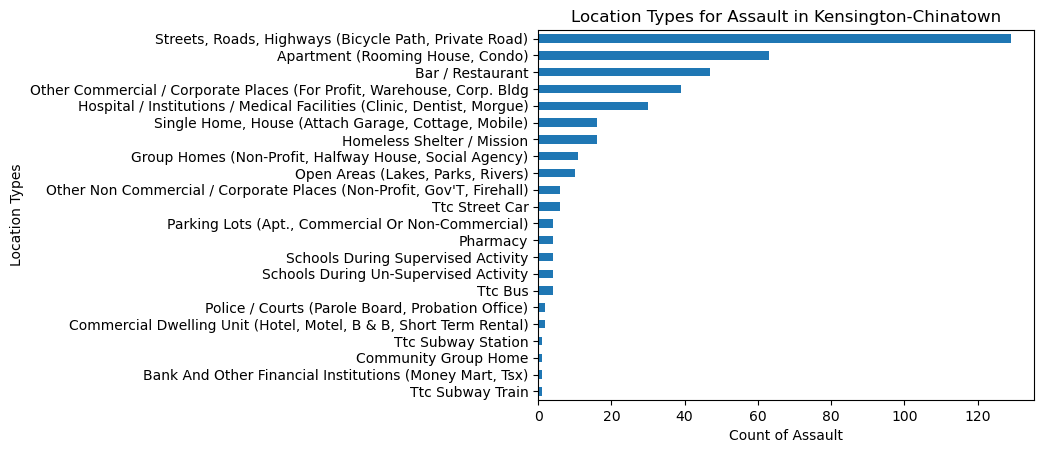

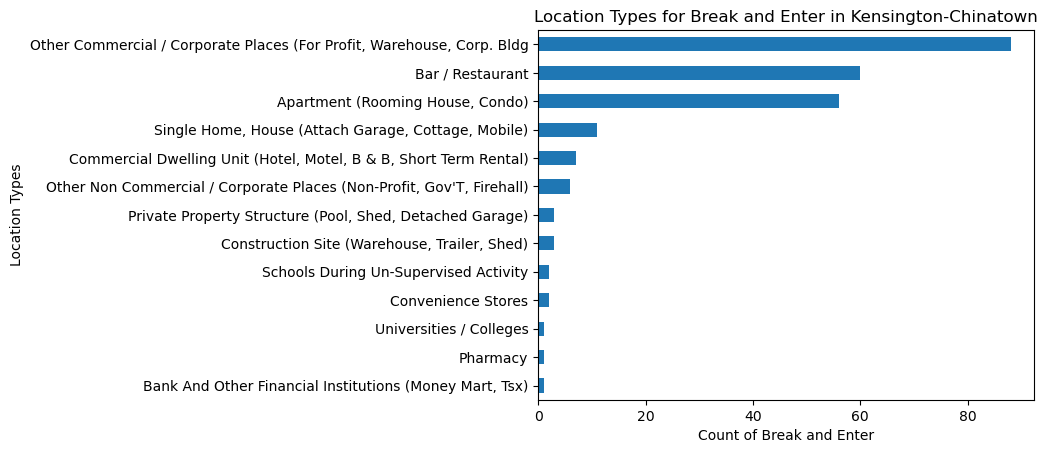

In [91]:
#Call off_location function to get location types for assault in KC
off_location(kc_hood, 'Assault', 'Kensington-Chinatown')
#Call off_location function to get location types for break and enter in KC
off_location(kc_hood, 'Break and Enter', 'Kensington-Chinatown')

### Neighbourhood 5: Yonge-Bay Corridor

In [92]:
#Inspect dataframe
ybc_hood

EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE  OCC_MONTH  OCC_YEAR  \
35        GO-20181091  2018-01-01  2018-01-01    January      2018   
37        GO-20181045  2018-01-01  2018-01-01    January      2018   
97       GO-201810473  2018-01-02  2018-01-02    January      2018   
117       GO-20189884  2018-01-02  2018-01-02    January      2018   
121      GO-201810473  2018-01-02  2018-01-02    January      2018   
...               ...         ...         ...        ...       ...   
34212   GO-2019692976  2019-04-17  2018-12-11   December      2018   
34688  GO-20211180957  2021-06-24  2018-05-15        May      2018   
34721  GO-20212443734  2021-12-19  2018-01-01    January      2018   
34733   GO-2022556192  2022-03-25  2018-11-24   November      2018   
34770  GO-20222533441  2022-12-27  2018-09-01  September      2018   

                                           LOCATION_TYPE PREMISES_TYPE  \
35     Commercial Dwelling Unit (Hotel, Motel, B & B,...    Commercial   
37     Other Commercial / Corporate Places (For Profi...    Commercial   
97     Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
117    Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
121    Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
...                                                  ...           ...   
34212  Other Commercial / Corporate Places (For Profi...    Commercial   
34688                            Universities / Colleges   Educational   
34721                                         Go Station       Transit   
34733  Other Commercial / Corporate Places (For Profi...    Commercial   
34770                   Apartment (Rooming House, Condo)     Apartment   

                   OFFENCE     MCI_CATEGORY HOOD_158   NEIGHBOURHOOD_158  
35                 Assault          Assault      170  Yonge-Bay Corridor  
37                 Assault          Assault      170  Yonge-Bay Corridor  
97                 Assault          Assault      170  Yonge-Bay Corridor  
117        Robbery - Other          Robbery      170  Yonge-Bay Corridor  
121    Assault With Weapon          Assault      170  Yonge-Bay Corridor  
...                    ...              ...      ...                 ...  
34212                  B&E  Break and Enter      170  Yonge-Bay Corridor  
34688              Assault          Assault      170  Yonge-Bay Corridor  
34721              Assault          Assault      170  Yonge-Bay Corridor  
34733              Assault          Assault      170  Yonge-Bay Corridor  
34770              Assault          Assault      170  Yonge-Bay Corridor  

[741 rows x 11 columns]

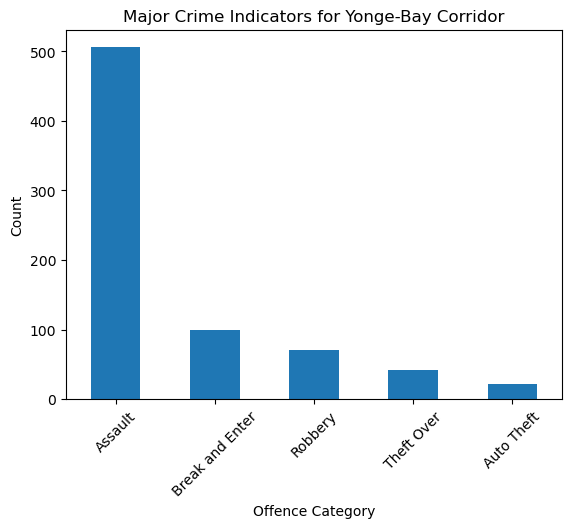

In [93]:
#Call mci_category function
mci_category(ybc_hood, 'Yonge-Bay Corridor')

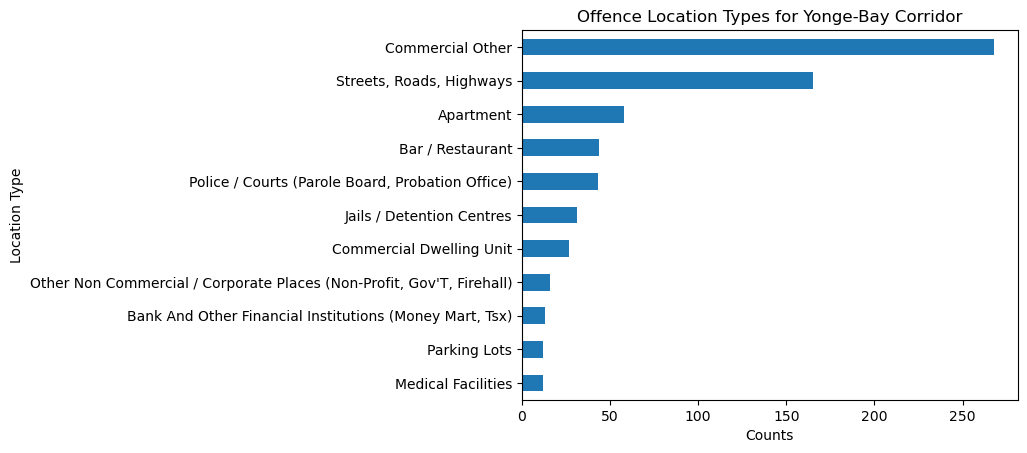

In [115]:
#Call location_types function
location_types(ybc_hood, 'Yonge-Bay Corridor')

In [157]:
#Call location_pct function for commercial other and streets/roads/highways
location_pct(ybc_hood, 'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg', 'Yonge-Bay Corridor')
location_pct(ybc_hood, 'Streets, Roads, Highways (Bicycle Path, Private Road)', 'Yonge-Bay Corridor')

Offences in Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg accounted for 36.17% of location types in Yonge-Bay Corridor in 2018.
Offences in Streets, Roads, Highways (Bicycle Path, Private Road) accounted for 22.27% of location types in Yonge-Bay Corridor in 2018.


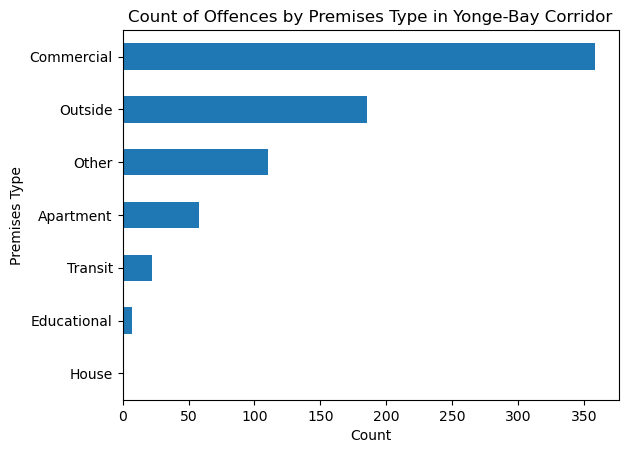

In [95]:
#Call premises_type function
premises_type(ybc_hood, 'Yonge-Bay Corridor')

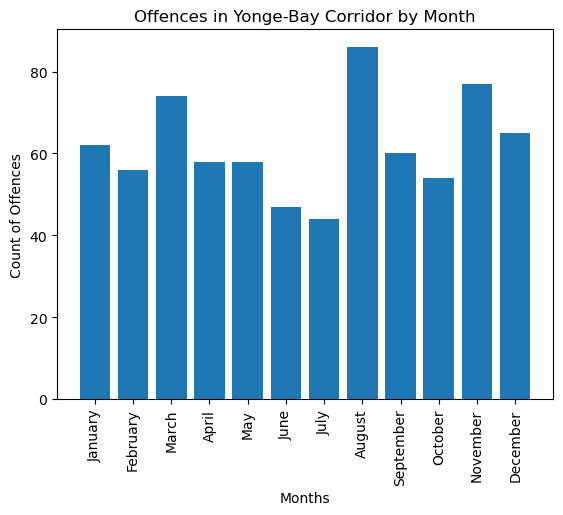

In [96]:
#Call monthly_offences function
monthly_offences(ybc_hood, 'Yonge-Bay Corridor')

In [158]:
#Call month_pct function on highest and lowest months
month_pct(ybc_hood, 'March', 'Yonge-Bay Corridor')
month_pct(ybc_hood, 'August', 'Yonge-Bay Corridor')
month_pct(ybc_hood, 'November', 'Yonge-Bay Corridor')
month_pct(ybc_hood, 'June', 'Yonge-Bay Corridor')
month_pct(ybc_hood, 'July', 'Yonge-Bay Corridor')

Offences in March accounted for 9.99% of all offences in Yonge-Bay Corridor in 2018.
Offences in August accounted for 11.61% of all offences in Yonge-Bay Corridor in 2018.
Offences in November accounted for 10.39% of all offences in Yonge-Bay Corridor in 2018.
Offences in June accounted for 6.34% of all offences in Yonge-Bay Corridor in 2018.
Offences in July accounted for 5.94% of all offences in Yonge-Bay Corridor in 2018.


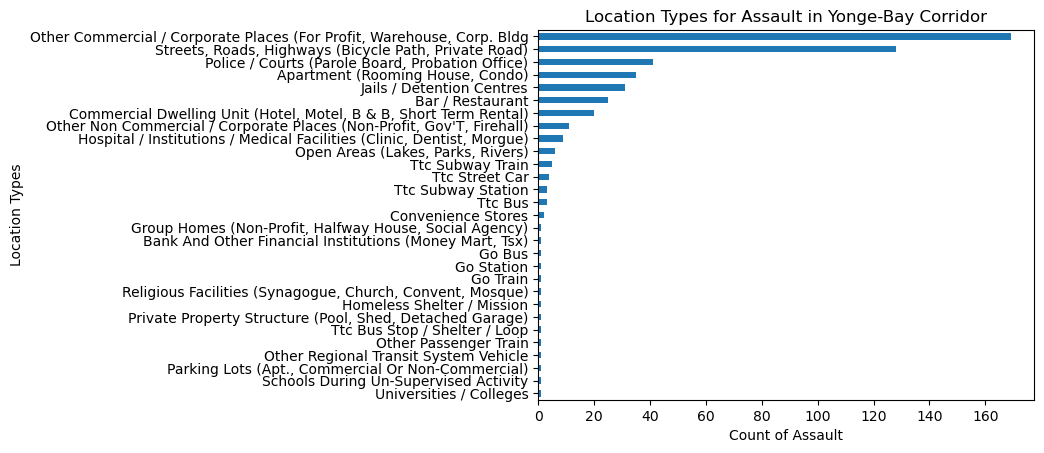

In [97]:
#Call off_location function to get location types for assault offences
off_location(ybc_hood, 'Assault', 'Yonge-Bay Corridor')

In [98]:
#Call offence_pct function
offence_pct(ybc_hood, 'Assault', 'Yonge-Bay Corridor')

Assault offences accounted for 68.29% of all offences in Yonge-Bay Corridor in 2018.


## Top 5 Neighbourhoods: Summary

In [100]:
#Separate the original mci_2018 dataframe using .loc to only keep the 
#rows from those top 5 neighbourhoods
top_5 = mci_2018.loc[(mci_2018['NEIGHBOURHOOD_158'] == 'West Humber-Clairville') | 
                     (mci_2018['NEIGHBOURHOOD_158'] == 'Moss Park') | 
                     (mci_2018['NEIGHBOURHOOD_158'] == 'Downtown Yonge East') | 
                     (mci_2018['NEIGHBOURHOOD_158'] == 'Kensington-Chinatown') |
                     (mci_2018['NEIGHBOURHOOD_158'] == 'Yonge-Bay Corridor')]
top_5.head()

EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE OCC_MONTH  OCC_YEAR  \
0      GO-20181532  2018-01-01  2018-01-01   January      2018   
35     GO-20181091  2018-01-01  2018-01-01   January      2018   
37     GO-20181045  2018-01-01  2018-01-01   January      2018   
59     GO-20182061  2018-01-01  2018-01-01   January      2018   
66     GO-20182608  2018-01-01  2018-01-01   January      2018   

                                        LOCATION_TYPE PREMISES_TYPE  \
0   Other Commercial / Corporate Places (For Profi...    Commercial   
35  Commercial Dwelling Unit (Hotel, Motel, B & B,...    Commercial   
37  Other Commercial / Corporate Places (For Profi...    Commercial   
59  Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
66  Parking Lots (Apt., Commercial Or Non-Commercial)       Outside   

              OFFENCE MCI_CATEGORY HOOD_158       NEIGHBOURHOOD_158  
0             Assault      Assault      168     Downtown Yonge East  
35            Assault      Assault      170      Yonge-Bay Corridor  
37            Assault      Assault      170      Yonge-Bay Corridor  
59  Robbery - Mugging      Robbery       73               Moss Park  
66         Theft Over   Theft Over        1  West Humber-Clairville

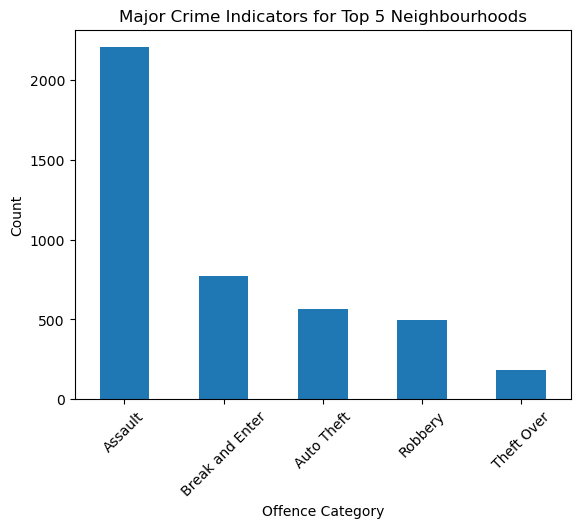

In [101]:
#Call mci_category function to get a bar chart showing the count of each MCI category
#for the top 5 neighbourhoods in 2018
mci_category(top_5, 'Top 5 Neighbourhoods')

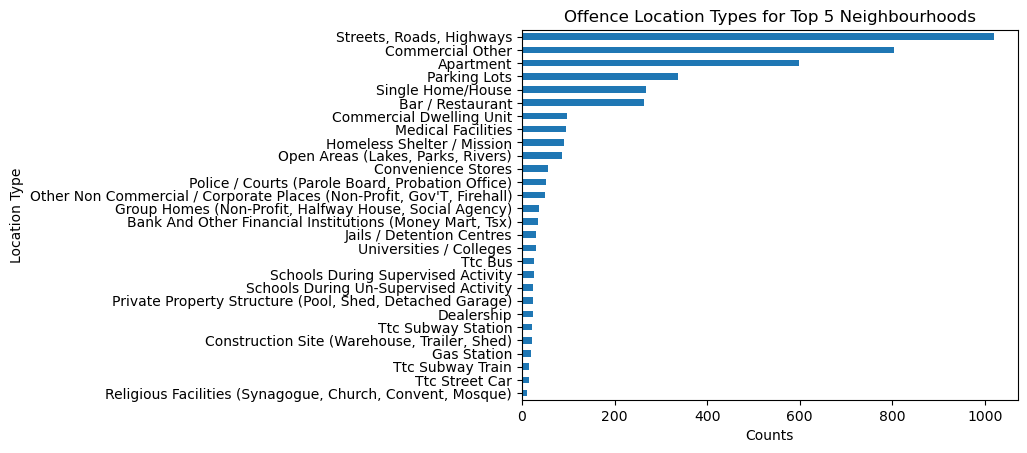

In [116]:
#Call location_types function
location_types(top_5, 'Top 5 Neighbourhoods')

In [160]:
#Call location_pct function for streets/roads/highways, commercial other and apartments
location_pct(top_5, 'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg', 'top 5 neighbourhoods')
location_pct(top_5, 'Streets, Roads, Highways (Bicycle Path, Private Road)', 'top 5 neighbourhoods')
location_pct(top_5, 'Apartment (Rooming House, Condo)', 'top 5 neighbourhoods')

Offences in Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg accounted for 19.02% of location types in top 5 neighbourhoods in 2018.
Offences in Streets, Roads, Highways (Bicycle Path, Private Road) accounted for 24.16% of location types in top 5 neighbourhoods in 2018.
Offences in Apartment (Rooming House, Condo) accounted for 14.16% of location types in top 5 neighbourhoods in 2018.


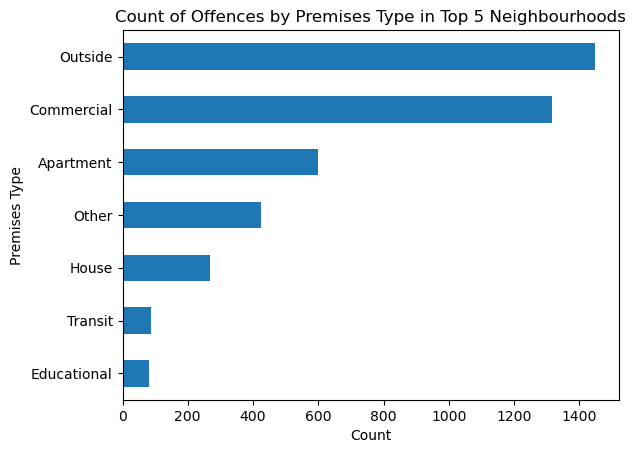

In [103]:
#Call premises_type function
premises_type(top_5, 'Top 5 Neighbourhoods')

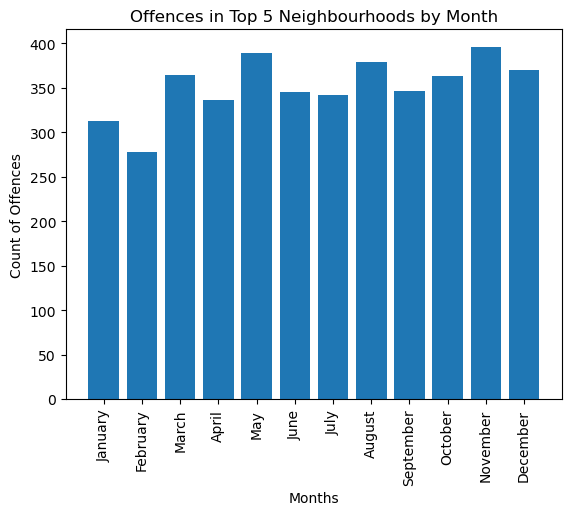

In [104]:
#Call monthly_offences function
monthly_offences(top_5, 'Top 5 Neighbourhoods')

In [162]:
#Call month_pct function on highest and lowest months
month_pct(top_5, 'March', 'top 5 neighbourhoods')
month_pct(top_5, 'May', 'top 5 neighbourhoods')
month_pct(top_5, 'August', 'top 5 neighbourhoods')
month_pct(top_5, 'November', 'top 5 neighbourhoods')
month_pct(top_5, 'December', 'top 5 neighbourhoods')
month_pct(top_5, 'February', 'top 5 neighbourhoods')

Offences in March accounted for 8.62% of all offences in top 5 neighbourhoods in 2018.
Offences in May accounted for 9.21% of all offences in top 5 neighbourhoods in 2018.
Offences in August accounted for 8.98% of all offences in top 5 neighbourhoods in 2018.
Offences in November accounted for 9.38% of all offences in top 5 neighbourhoods in 2018.
Offences in December accounted for 8.76% of all offences in top 5 neighbourhoods in 2018.
Offences in February accounted for 6.58% of all offences in top 5 neighbourhoods in 2018.


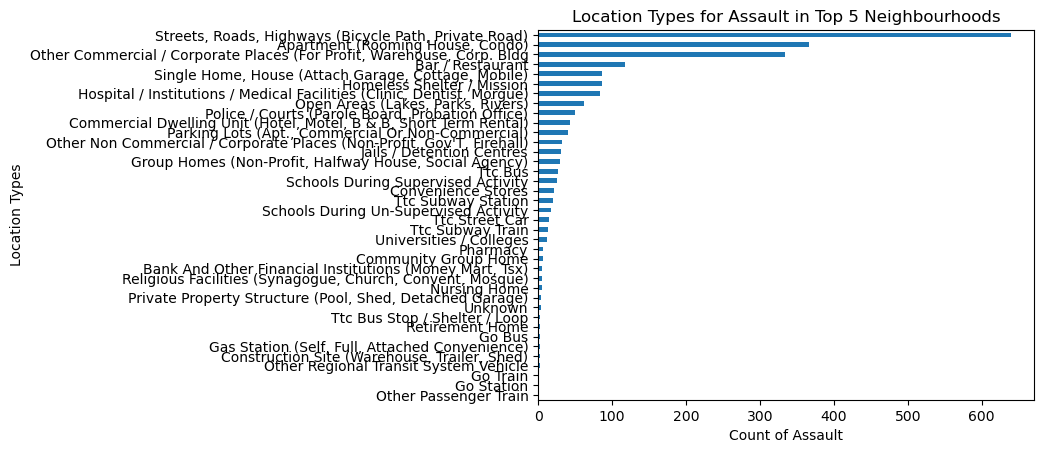

In [105]:
#Call off_location to get location types for assault in top 5 neighbourhoods combined
off_location(top_5, 'Assault', 'Top 5 Neighbourhoods')

In [106]:
#Call offence_pct function to get percentage of assault offences
offence_pct(top_5, 'Assault', 'top 5 neighbourhoods')

Assault offences accounted for 52.25% of all offences in top 5 neighbourhoods in 2018.


## Bottom 5 Neighbourhoods
We separated the bottom 5 neighbourhoods in their own dataframes to further analyze them.

In [107]:
#Separate mci_2018 dataframe into 5 dataframes for each of the bottom 5 neighbourhoods
gw_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'Guildwood']
ysc_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'Yonge-St.Clair']
wl_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'Woodbine-Lumsden']
lbp_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'Lambton Baby Point']
ml_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'Maple Leaf']

### Neighbourhood 1: Guildwood

In [108]:
#Inspect dataframe
gw_hood.head()

EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE OCC_MONTH  OCC_YEAR  \
318    GO-201824606  2018-01-05  2018-01-05   January      2018   
367    GO-201832262  2018-01-06  2018-01-05   January      2018   
368    GO-201831792  2018-01-06  2018-01-05   January      2018   
441    GO-201838800  2018-01-07  2018-01-07   January      2018   
949    GO-201881107  2018-01-13  2018-01-13   January      2018   

                                         LOCATION_TYPE PREMISES_TYPE  OFFENCE  \
318                                 Convenience Stores    Commercial      B&E   
367  Dealership (Car, Motorcycle, Marine, Trailer, ...    Commercial      B&E   
368  Dealership (Car, Motorcycle, Marine, Trailer, ...    Commercial      B&E   
441                   Apartment (Rooming House, Condo)     Apartment  Assault   
949  Single Home, House (Attach Garage, Cottage, Mo...         House      B&E   

        MCI_CATEGORY HOOD_158 NEIGHBOURHOOD_158  
318  Break and Enter      140         Guildwood  
367  Break and Enter      140         Guildwood  
368  Break and Enter      140         Guildwood  
441          Assault      140         Guildwood  
949  Break and Enter      140         Guildwood

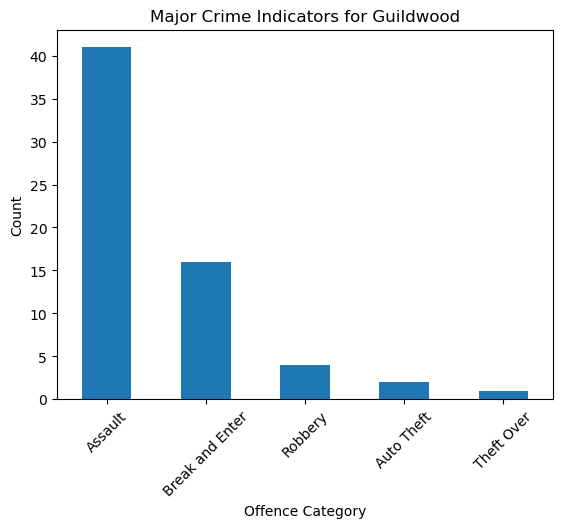

In [109]:
#Call mci_category function to get a bar chart with count of offences by category
mci_category(gw_hood, 'Guildwood') 

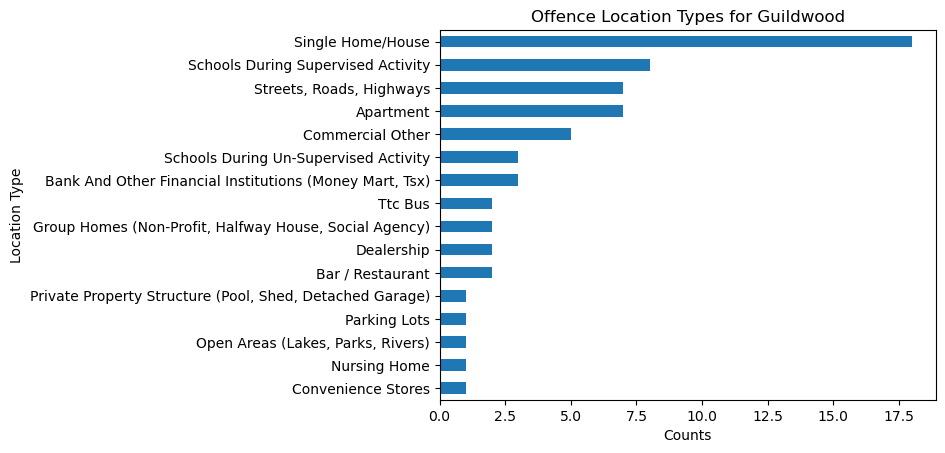

In [117]:
#Call location_types function to get bar chart with count of offences per location type
location_types(gw_hood, 'Guildwood')

In [125]:
#Call location_pct function for single homes/houses
location_pct(gw_hood, 'Single Home, House (Attach Garage, Cottage, Mobile)', 'Guildwood')

Offences in Single Home, House (Attach Garage, Cottage, Mobile) accounted for 28.12% of location types in Guildwood in 2018.


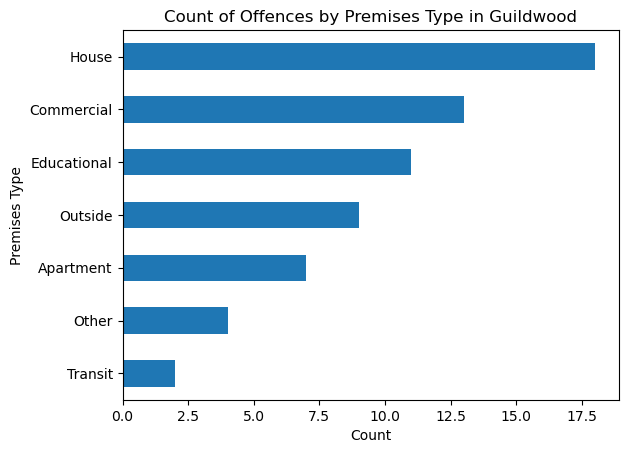

In [118]:
#Call premises_type function to get count of offences by premise type
premises_type(gw_hood, 'Guildwood')

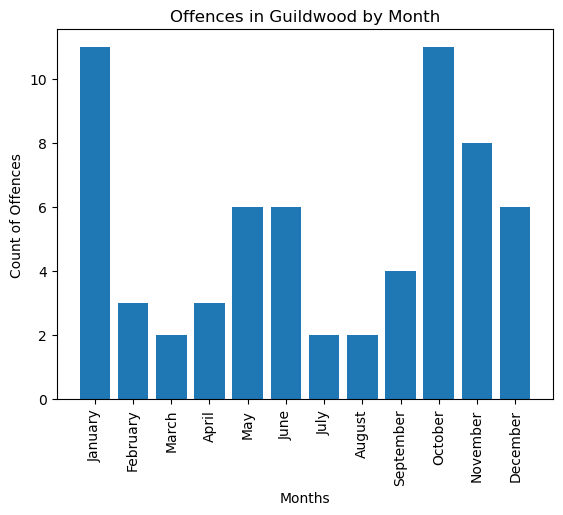

In [119]:
#Call monthly_offences function to get count of offences by month
monthly_offences(gw_hood, 'Guildwood')

In [163]:
#Call month_pct function on highest and lowest months
month_pct(gw_hood, 'January', 'Guildwood')
month_pct(gw_hood, 'October', 'Guildwood')
month_pct(gw_hood, 'March', 'Guildwood')
month_pct(gw_hood, 'July', 'Guildwood')
month_pct(gw_hood, 'August', 'Guildwood')

Offences in January accounted for 17.19% of all offences in Guildwood in 2018.
Offences in October accounted for 17.19% of all offences in Guildwood in 2018.
Offences in March accounted for 3.12% of all offences in Guildwood in 2018.
Offences in July accounted for 3.12% of all offences in Guildwood in 2018.
Offences in August accounted for 3.12% of all offences in Guildwood in 2018.


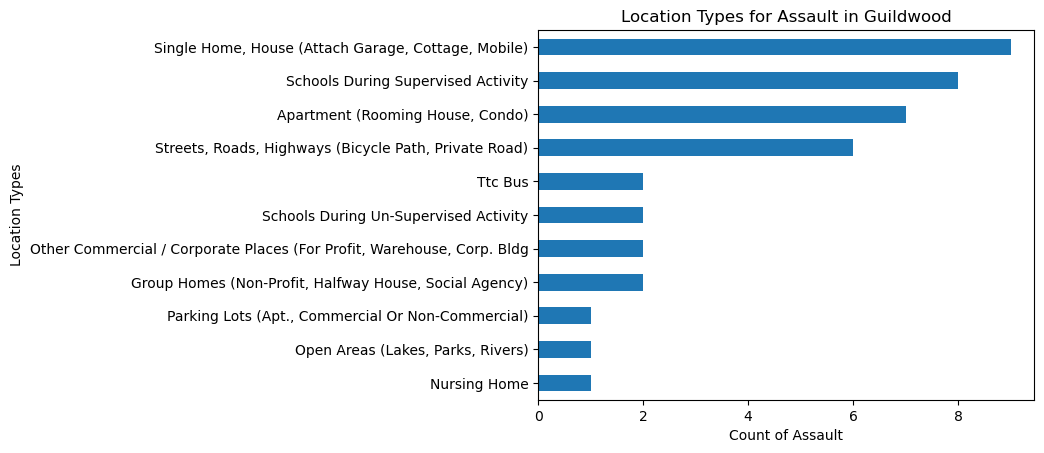

In [120]:
#Call off_location function to get count of assault offences by location type
off_location(gw_hood, 'Assault', 'Guildwood')

In [121]:
#Call offence_pct function to get percentage of assault offences
offence_pct(gw_hood, 'Assault', 'Guildwood')

Assault offences accounted for 64.06% of all offences in Guildwood in 2018.


### Neighbourhood 2: Yonge-St.Clair

In [126]:
#Inspect dataframe
ysc_hood.head()

EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE OCC_MONTH  OCC_YEAR  \
353     GO-201831711  2018-01-06  2018-01-06   January      2018   
642     GO-201853174  2018-01-09  2018-01-09   January      2018   
736     GO-201860401  2018-01-10  2018-01-10   January      2018   
1037    GO-201885805  2018-01-14  2018-01-12   January      2018   
1480   GO-2018112400  2018-01-19  2018-01-18   January      2018   

                                          LOCATION_TYPE PREMISES_TYPE  \
353   Other Commercial / Corporate Places (For Profi...    Commercial   
642   Parking Lots (Apt., Commercial Or Non-Commercial)       Outside   
736                    Apartment (Rooming House, Condo)     Apartment   
1037  Single Home, House (Attach Garage, Cottage, Mo...         House   
1480  Single Home, House (Attach Garage, Cottage, Mo...         House   

           OFFENCE     MCI_CATEGORY HOOD_158 NEIGHBOURHOOD_158  
353            B&E  Break and Enter       97    Yonge-St.Clair  
642        Assault          Assault       97    Yonge-St.Clair  
736        Assault          Assault       97    Yonge-St.Clair  
1037  B&E W'Intent  Break and Enter       97    Yonge-St.Clair  
1480           B&E  Break and Enter       97    Yonge-St.Clair

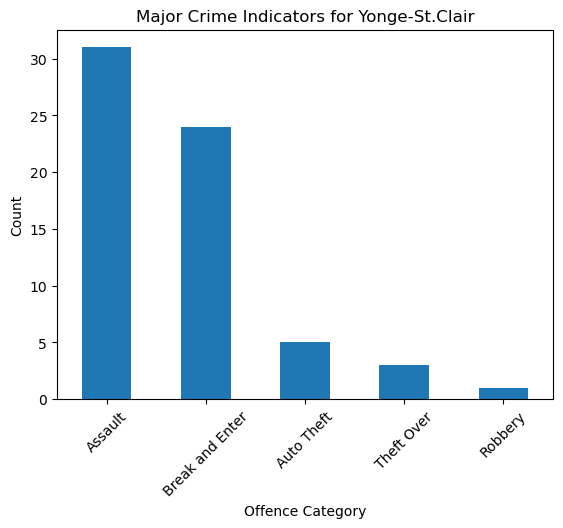

In [127]:
#Call mci_category function
mci_category(ysc_hood, 'Yonge-St.Clair')

In [132]:
#Call offence_pct function
offence_pct(ysc_hood, 'Assault', 'Yonge-St.Clair')
offence_pct(ysc_hood, 'Break and Enter', 'Yonge-St.Clair')

Assault offences accounted for 48.44% of all offences in Yonge-St.Clair in 2018.
Break and Enter offences accounted for 37.5% of all offences in Yonge-St.Clair in 2018.


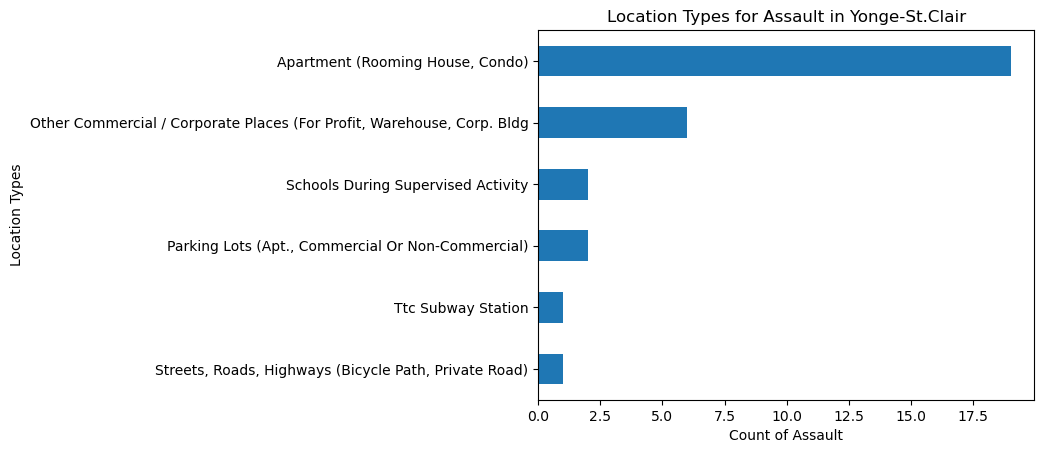

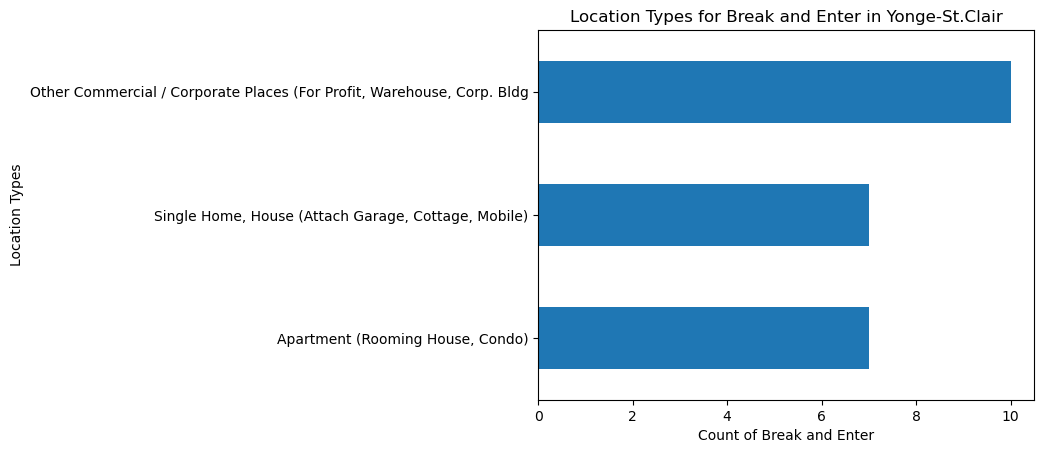

In [135]:
#Call off_location function for assault and break and enter
off_location(ysc_hood, 'Assault', 'Yonge-St.Clair')
off_location(ysc_hood, 'Break and Enter', 'Yonge-St.Clair')

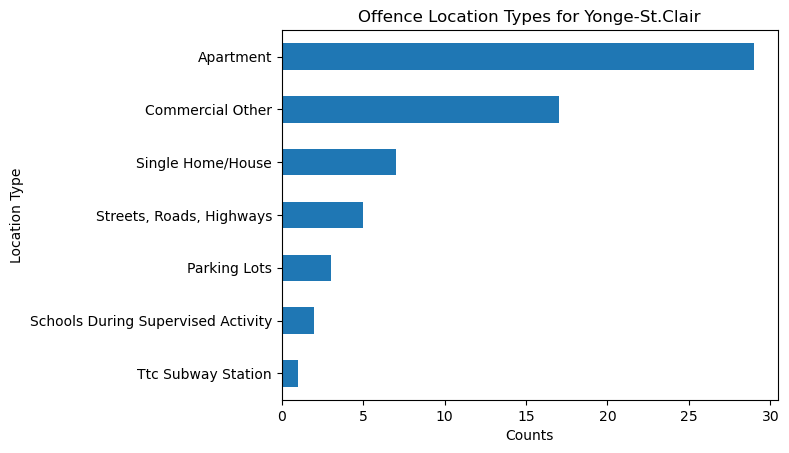

In [128]:
#Call location_types function
location_types(ysc_hood, 'Yonge-St.Clair')

In [131]:
#Call location_pct function
location_pct(ysc_hood, 'Apartment (Rooming House, Condo)', 'Yonge-St.Clair')
location_pct(ysc_hood, 'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg', 'Yonge-St.Clair')

Offences in Apartment (Rooming House, Condo) accounted for 45.31% of location types in Yonge-St.Clair in 2018.
Offences in Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg accounted for 26.56% of location types in Yonge-St.Clair in 2018.


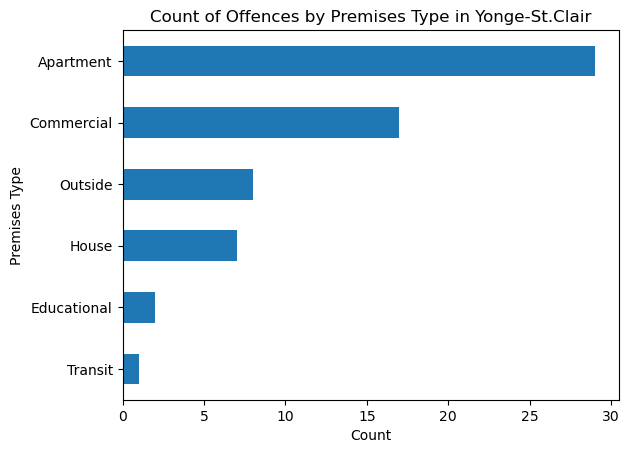

In [129]:
#Call premises_type function
premises_type(ysc_hood, 'Yonge-St.Clair')

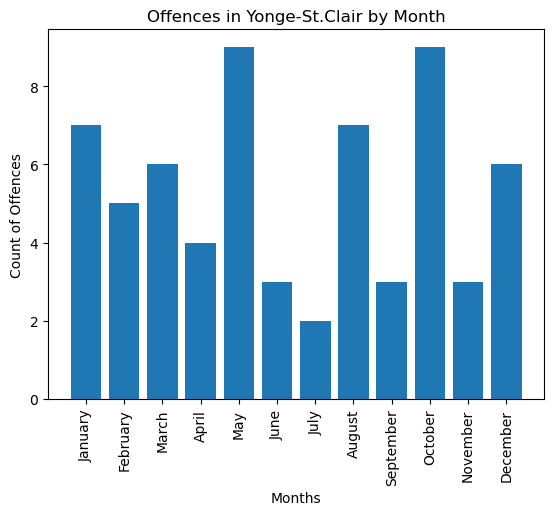

In [133]:
#Call monthly_offences function
monthly_offences(ysc_hood, 'Yonge-St.Clair')

In [136]:
#Call month_pct function on 2 highest months and on lowest month

month_pct(ysc_hood, 'May', 'Yonge-St.Clair')
month_pct(ysc_hood, 'October', 'Yonge-St.Clair')
month_pct(ysc_hood, 'July', 'Yonge-St.Clair')

Offences in May accounted for 14.06% of all offences in Yonge-St.Clair in 2018.
Offences in October accounted for 14.06% of all offences in Yonge-St.Clair in 2018.
Offences in July accounted for 3.12% of all offences in Yonge-St.Clair in 2018.


### Neighbourhood 3: Woodbine-Lumsden

In [164]:
#Inspect dataframe
wl_hood.head()

EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE OCC_MONTH  OCC_YEAR  \
762     GO-201861579  2018-01-10  2018-01-09   January      2018   
1070    GO-201886826  2018-01-14  2018-01-14   January      2018   
1205    GO-201893796  2018-01-16  2018-01-16   January      2018   
1390   GO-2018111885  2018-01-18  2018-01-18   January      2018   
1912   GO-2018151152  2018-01-24  2018-01-22   January      2018   

                                          LOCATION_TYPE PREMISES_TYPE  \
762                    Apartment (Rooming House, Condo)     Apartment   
1070                  Open Areas (Lakes, Parks, Rivers)       Outside   
1205  Single Home, House (Attach Garage, Cottage, Mo...         House   
1390                   Apartment (Rooming House, Condo)     Apartment   
1912                   Apartment (Rooming House, Condo)     Apartment   

                  OFFENCE     MCI_CATEGORY HOOD_158 NEIGHBOURHOOD_158  
762          B&E W'Intent  Break and Enter       60  Woodbine-Lumsden  
1070              Assault          Assault       60  Woodbine-Lumsden  
1205              Assault          Assault       60  Woodbine-Lumsden  
1390                  B&E  Break and Enter       60  Woodbine-Lumsden  
1912  Assault Bodily Harm          Assault       60  Woodbine-Lumsden

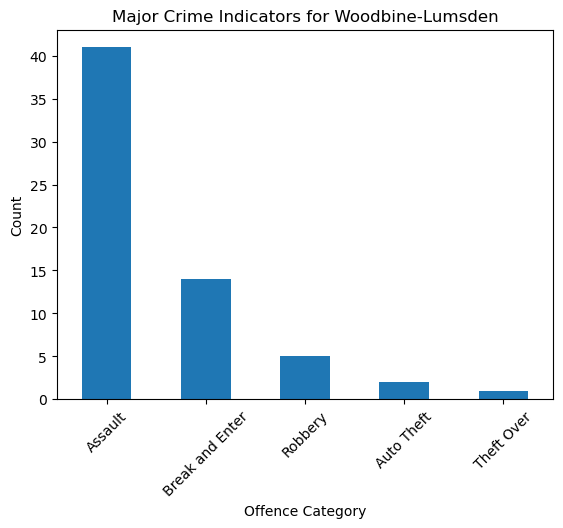

In [165]:
#Call mci_category function
mci_category(wl_hood, 'Woodbine-Lumsden')

In [166]:
#Call offence_pct functino for assault
offence_pct(wl_hood, 'Assault', 'Woodbine-Lumsden')

Assault offences accounted for 65.08% of all offences in Woodbine-Lumsden in 2018.


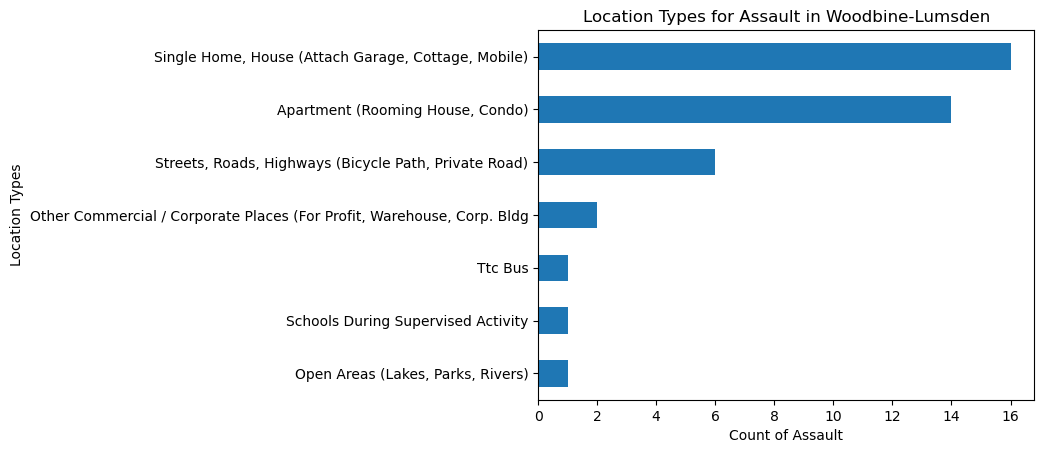

In [167]:
#Call off_location function for assault
off_location(wl_hood, 'Assault', 'Woodbine-Lumsden')

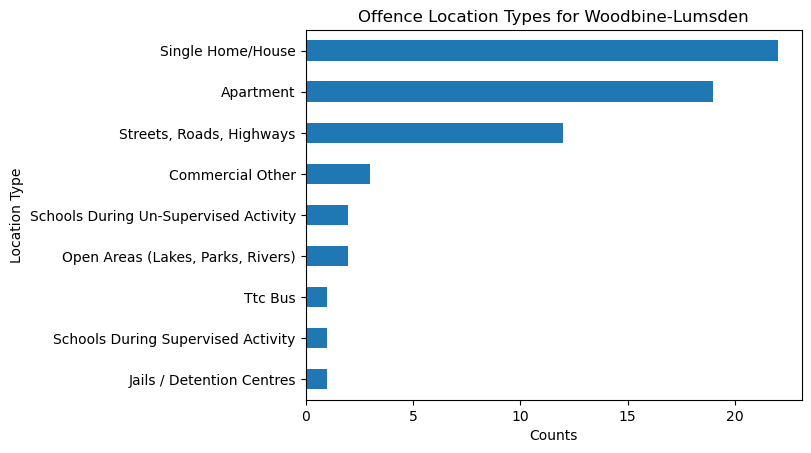

In [168]:
#Call location_types function
location_types(wl_hood, 'Woodbine-Lumsden')

In [169]:
#Call location_pct function for single homes/houses and apartments
location_pct(wl_hood, 'Single Home, House (Attach Garage, Cottage, Mobile)', 'Woodbine-Lumsden')
location_pct(wl_hood, 'Apartment (Rooming House, Condo)', 'Woodbine-Lumsden')

Offences in Single Home, House (Attach Garage, Cottage, Mobile) accounted for 34.92% of location types in Woodbine-Lumsden in 2018.
Offences in Apartment (Rooming House, Condo) accounted for 30.16% of location types in Woodbine-Lumsden in 2018.


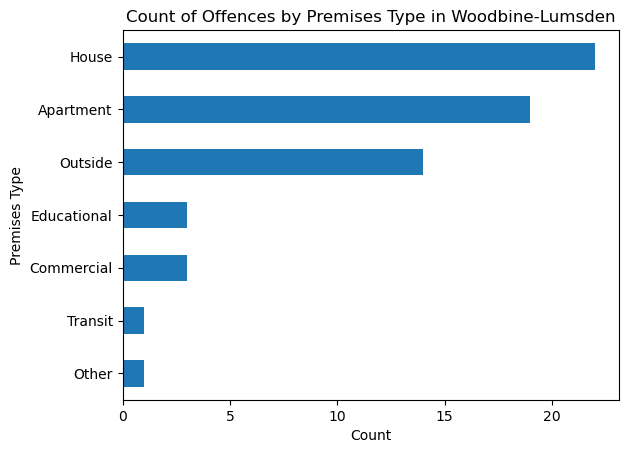

In [170]:
#Call premises_type function
premises_type(wl_hood, 'Woodbine-Lumsden')

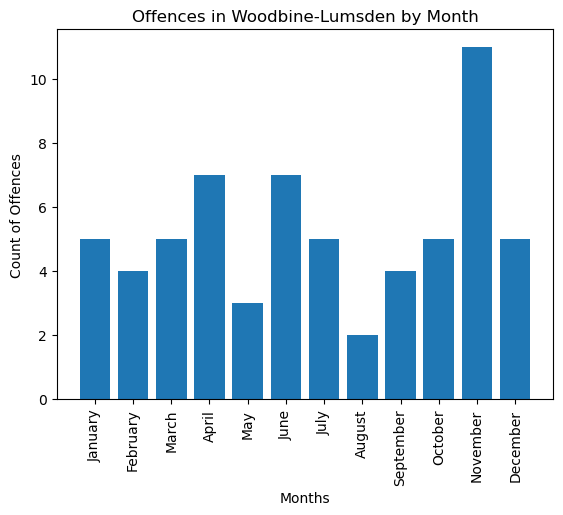

In [171]:
#Call monthly_offences function
monthly_offences(wl_hood, 'Woodbine-Lumsden')

In [174]:
#Call month_pct function for highest and lowest months
month_pct(wl_hood, 'November', 'Woodbine-Lumsden')
month_pct(wl_hood, 'April', 'Woodbine-Lumsden')
month_pct(wl_hood, 'June', 'Woodbine-Lumsden')
month_pct(wl_hood, 'May', 'Woodbine-Lumsden')
month_pct(wl_hood, 'August', 'Woodbine-Lumsden')

Offences in November accounted for 17.46% of all offences in Woodbine-Lumsden in 2018.
Offences in April accounted for 11.11% of all offences in Woodbine-Lumsden in 2018.
Offences in June accounted for 11.11% of all offences in Woodbine-Lumsden in 2018.
Offences in May accounted for 4.76% of all offences in Woodbine-Lumsden in 2018.
Offences in August accounted for 3.17% of all offences in Woodbine-Lumsden in 2018.


### Neighbourhood 4: Lambton Baby Point

In [175]:
#Inspect dataframe
lbp_hood.head()

EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE OCC_MONTH  OCC_YEAR  \
741     GO-201859704  2018-01-10  2018-01-10   January      2018   
891     GO-201873467  2018-01-12  2018-01-12   January      2018   
957     GO-201875443  2018-01-13  2018-01-12   January      2018   
1929   GO-2018152556  2018-01-24  2018-01-24   January      2018   
3716   GO-2018284986  2018-02-14  2018-02-14  February      2018   

                                          LOCATION_TYPE PREMISES_TYPE  \
741                    Apartment (Rooming House, Condo)     Apartment   
891                       Ttc Bus Stop / Shelter / Loop       Outside   
957   Single Home, House (Attach Garage, Cottage, Mo...         House   
1929                   Apartment (Rooming House, Condo)     Apartment   
3716                   Apartment (Rooming House, Condo)     Apartment   

                  OFFENCE     MCI_CATEGORY HOOD_158   NEIGHBOURHOOD_158  
741               Assault          Assault      114  Lambton Baby Point  
891               Assault          Assault      114  Lambton Baby Point  
957                   B&E  Break and Enter      114  Lambton Baby Point  
1929  Assault With Weapon          Assault      114  Lambton Baby Point  
3716              Assault          Assault      114  Lambton Baby Point

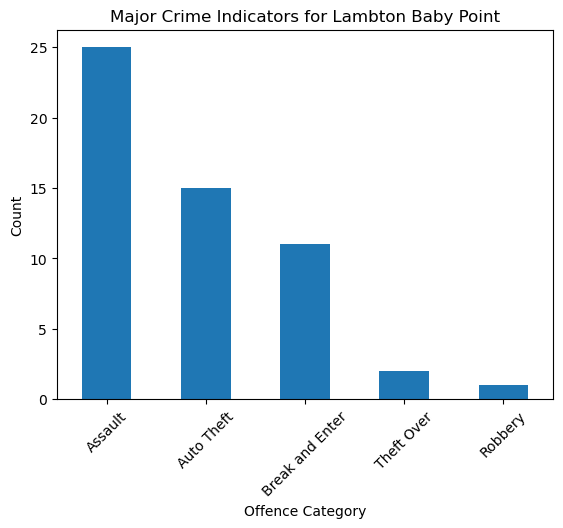

In [176]:
#Call mci_category functoin
mci_category(lbp_hood, 'Lambton Baby Point')

In [177]:
#Call offence_pct function for assault, auto theft and break and enter
offence_pct(lbp_hood, 'Assault', 'Lambton Baby Point')
offence_pct(lbp_hood, 'Auto Theft', 'Lambton Baby Point')
offence_pct(lbp_hood, 'Break and Enter', 'Lambton Baby Point')

Assault offences accounted for 46.3% of all offences in Lambton Baby Point in 2018.
Auto Theft offences accounted for 27.78% of all offences in Lambton Baby Point in 2018.
Break and Enter offences accounted for 20.37% of all offences in Lambton Baby Point in 2018.


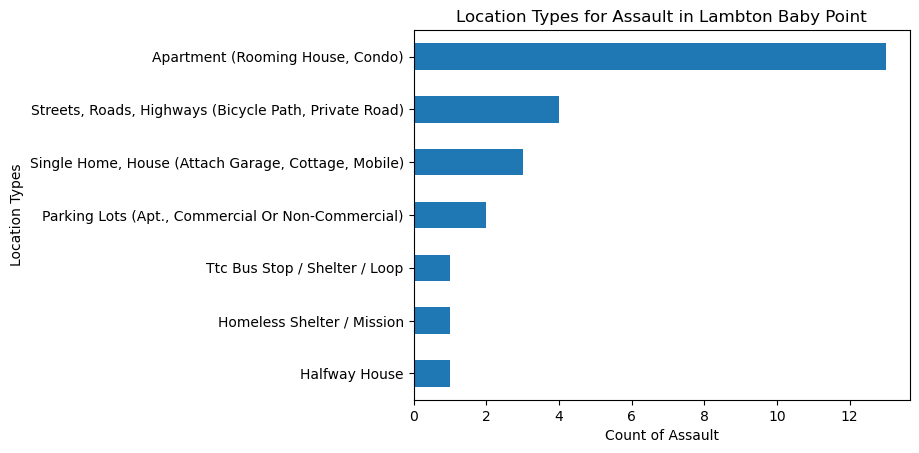

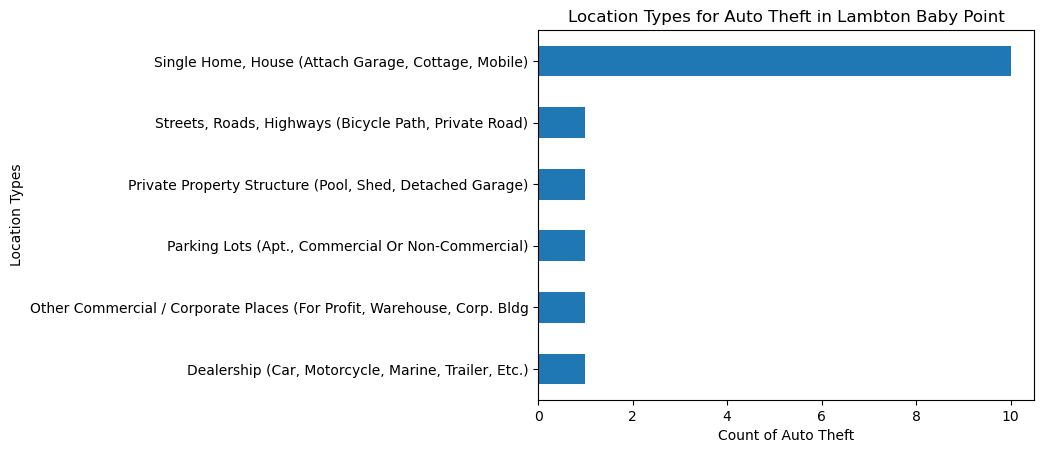

In [178]:
#Call off_location function for assault and auto theft
off_location(lbp_hood, 'Assault', 'Lambton Baby Point')
off_location(lbp_hood, 'Auto Theft', 'Lambton Baby Point')

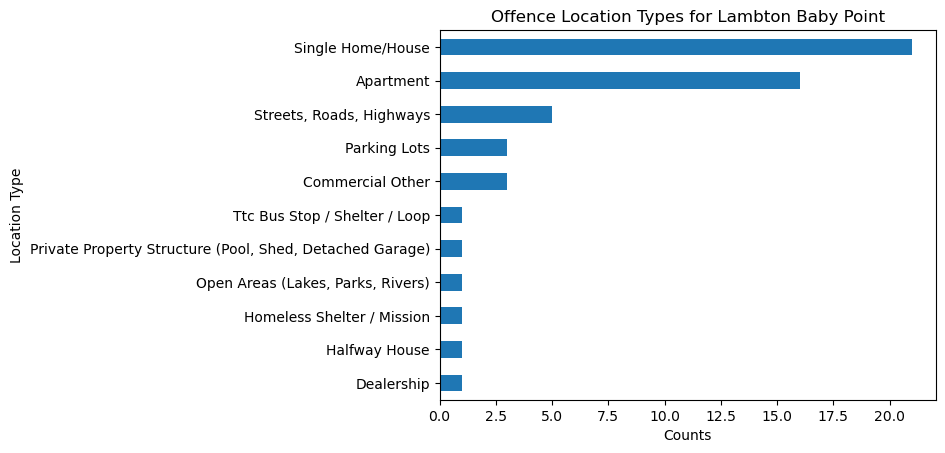

In [179]:
#Call location_types function
location_types(lbp_hood, 'Lambton Baby Point')

In [180]:
#Call location_pct function for single homes/houses and apartments
location_pct(lbp_hood, 'Single Home, House (Attach Garage, Cottage, Mobile)', 'Lambton Baby Point')
location_pct(lbp_hood, 'Apartment (Rooming House, Condo)', 'Lambton Baby Point')

Offences in Single Home, House (Attach Garage, Cottage, Mobile) accounted for 38.89% of location types in Lambton Baby Point in 2018.
Offences in Apartment (Rooming House, Condo) accounted for 29.63% of location types in Lambton Baby Point in 2018.


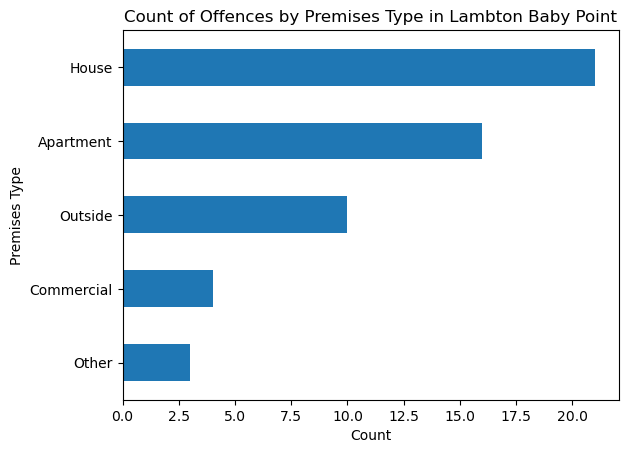

In [181]:
#Call premises_type function
premises_type(lbp_hood, 'Lambton Baby Point')

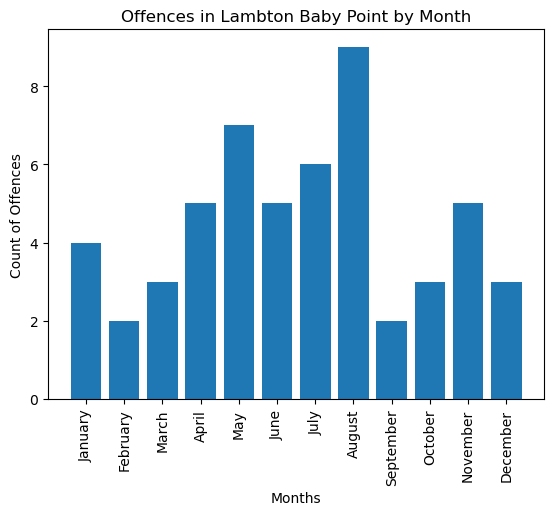

In [182]:
#Call monthly_offences function
monthly_offences(lbp_hood, 'Lambton Baby Point')

In [183]:
#Call month_pct function for highest and lowest months
month_pct(lbp_hood, 'May', 'Lambton Baby Point')
month_pct(lbp_hood, 'August', 'Lambton Baby Point')
month_pct(lbp_hood, 'February', 'Lambton Baby Point')
month_pct(lbp_hood, 'September', 'Lambton Baby Point')

Offences in May accounted for 12.96% of all offences in Lambton Baby Point in 2018.
Offences in August accounted for 16.67% of all offences in Lambton Baby Point in 2018.
Offences in February accounted for 3.7% of all offences in Lambton Baby Point in 2018.
Offences in September accounted for 3.7% of all offences in Lambton Baby Point in 2018.


### Neighbourhood 5: Maple Leaf

In [184]:
#Inspect dataframe
ml_hood.head()

EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE OCC_MONTH  OCC_YEAR  \
69       GO-20182804  2018-01-01  2018-01-01   January      2018   
1955   GO-2018147164  2018-01-24  2018-01-23   January      2018   
2790   GO-2018216091  2018-02-03  2018-02-03  February      2018   
3039   GO-2018232985  2018-02-06  2018-02-06  February      2018   
3066   GO-2018233713  2018-02-06  2018-02-06  February      2018   

                                          LOCATION_TYPE PREMISES_TYPE  \
69    Single Home, House (Attach Garage, Cottage, Mo...         House   
1955  Private Property Structure (Pool, Shed, Detach...         Other   
2790                   Apartment (Rooming House, Condo)     Apartment   
3039  Single Home, House (Attach Garage, Cottage, Mo...         House   
3066  Single Home, House (Attach Garage, Cottage, Mo...         House   

                     OFFENCE     MCI_CATEGORY HOOD_158 NEIGHBOURHOOD_158  
69       Assault With Weapon          Assault       29        Maple Leaf  
1955  Theft Of Motor Vehicle       Auto Theft       29        Maple Leaf  
2790                 Assault          Assault       29        Maple Leaf  
3039                     B&E  Break and Enter       29        Maple Leaf  
3066                     B&E  Break and Enter       29        Maple Leaf

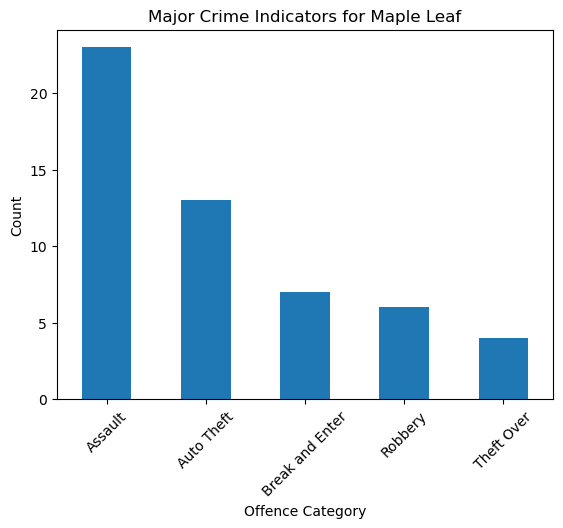

In [185]:
#Call mci_category function
mci_category(ml_hood, 'Maple Leaf')

In [186]:
#Call offence_pct function on assault and auto theft
offence_pct(ml_hood, 'Assault', 'Maple Leaf')
offence_pct(ml_hood, 'Auto Theft', 'Maple Leaf')

Assault offences accounted for 43.4% of all offences in Maple Leaf in 2018.
Auto Theft offences accounted for 24.53% of all offences in Maple Leaf in 2018.


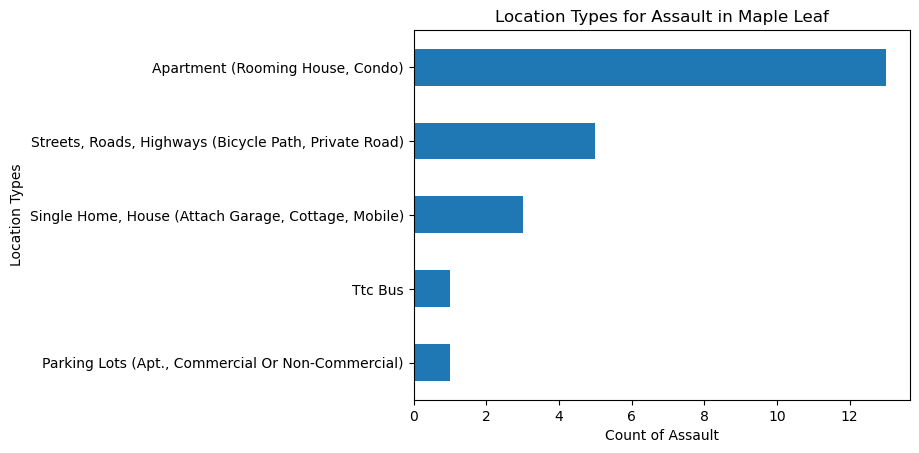

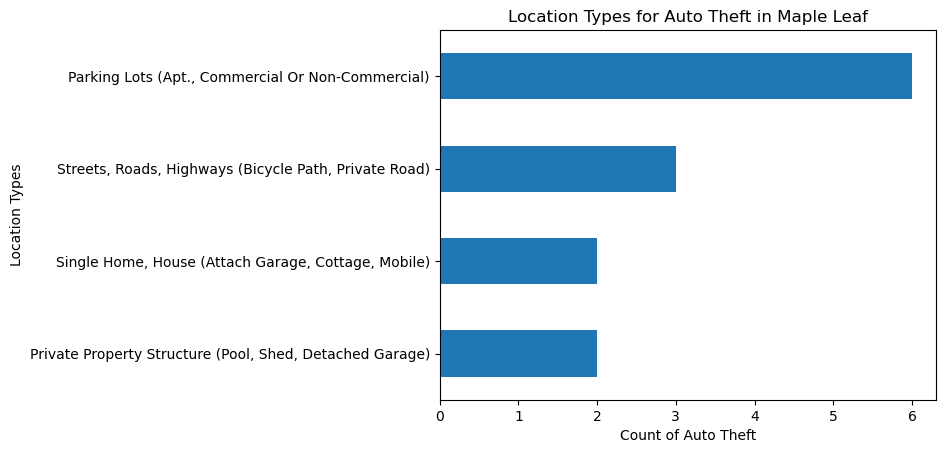

In [187]:
#Call off_location function for assault and auto theft
off_location(ml_hood, 'Assault', 'Maple Leaf')
off_location(ml_hood, 'Auto Theft', 'Maple Leaf')

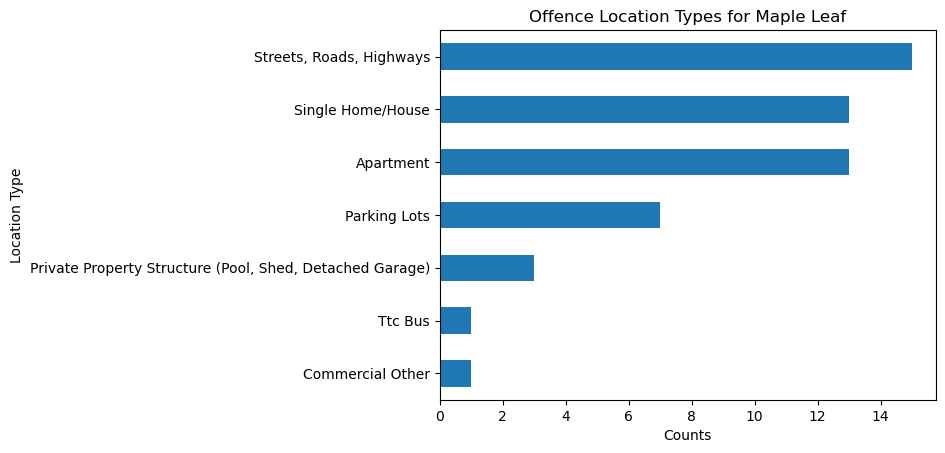

In [188]:
#Call location_types function
location_types(ml_hood, 'Maple Leaf')

In [189]:
#Call location_pct function for streets/roads/highways, single homes/houses and apartments
location_pct(ml_hood, 'Streets, Roads, Highways (Bicycle Path, Private Road)', 'Maple Leaf')
location_pct(ml_hood, 'Single Home, House (Attach Garage, Cottage, Mobile)', 'Maple Leaf')
location_pct(ml_hood, 'Apartment (Rooming House, Condo)', 'Maple Leaf')

Offences in Streets, Roads, Highways (Bicycle Path, Private Road) accounted for 28.3% of location types in Maple Leaf in 2018.
Offences in Single Home, House (Attach Garage, Cottage, Mobile) accounted for 24.53% of location types in Maple Leaf in 2018.
Offences in Apartment (Rooming House, Condo) accounted for 24.53% of location types in Maple Leaf in 2018.


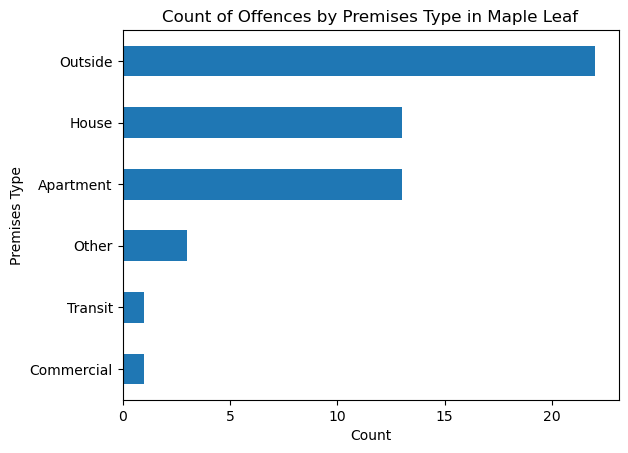

In [190]:
#Call premises_type function
premises_type(ml_hood, 'Maple Leaf')

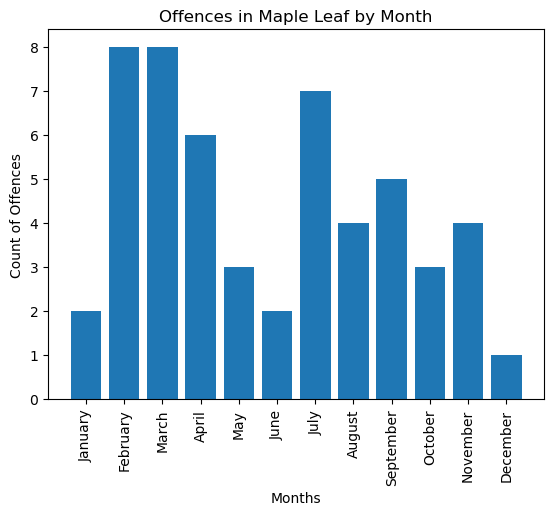

In [191]:
#Call monthly_offences function
monthly_offences(ml_hood, 'Maple Leaf')

In [192]:
#Call month_pct function for highest and lowest months
month_pct(ml_hood, 'February', 'Maple Leaf')
month_pct(ml_hood, 'March', 'Maple Leaf')
month_pct(ml_hood, 'July', 'Maple Leaf')
month_pct(ml_hood, 'January', 'Maple Leaf')
month_pct(ml_hood, 'June', 'Maple Leaf')
month_pct(ml_hood, 'December', 'Maple Leaf')

Offences in February accounted for 15.09% of all offences in Maple Leaf in 2018.
Offences in March accounted for 15.09% of all offences in Maple Leaf in 2018.
Offences in July accounted for 13.21% of all offences in Maple Leaf in 2018.
Offences in January accounted for 3.77% of all offences in Maple Leaf in 2018.
Offences in June accounted for 3.77% of all offences in Maple Leaf in 2018.
Offences in December accounted for 1.89% of all offences in Maple Leaf in 2018.


## Bottom 5 Neighbourhoods: Summary

In [193]:
#Separate the original mci_2018 dataframe using .loc to only keep the 
#rows from those bottom 5 neighbourhoods
bottom_5 = mci_2018.loc[(mci_2018['NEIGHBOURHOOD_158'] == 'Guildwood') | 
                     (mci_2018['NEIGHBOURHOOD_158'] == 'Yonge-St.Clair') | 
                     (mci_2018['NEIGHBOURHOOD_158'] == 'Woodbine-Lumsden') | 
                     (mci_2018['NEIGHBOURHOOD_158'] == 'Lambton Baby Point') |
                     (mci_2018['NEIGHBOURHOOD_158'] == 'Maple Leaf')]
bottom_5.head()

EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE OCC_MONTH  OCC_YEAR  \
69      GO-20182804  2018-01-01  2018-01-01   January      2018   
318    GO-201824606  2018-01-05  2018-01-05   January      2018   
353    GO-201831711  2018-01-06  2018-01-06   January      2018   
367    GO-201832262  2018-01-06  2018-01-05   January      2018   
368    GO-201831792  2018-01-06  2018-01-05   January      2018   

                                         LOCATION_TYPE PREMISES_TYPE  \
69   Single Home, House (Attach Garage, Cottage, Mo...         House   
318                                 Convenience Stores    Commercial   
353  Other Commercial / Corporate Places (For Profi...    Commercial   
367  Dealership (Car, Motorcycle, Marine, Trailer, ...    Commercial   
368  Dealership (Car, Motorcycle, Marine, Trailer, ...    Commercial   

                 OFFENCE     MCI_CATEGORY HOOD_158 NEIGHBOURHOOD_158  
69   Assault With Weapon          Assault       29        Maple Leaf  
318                  B&E  Break and Enter      140         Guildwood  
353                  B&E  Break and Enter       97    Yonge-St.Clair  
367                  B&E  Break and Enter      140         Guildwood  
368                  B&E  Break and Enter      140         Guildwood

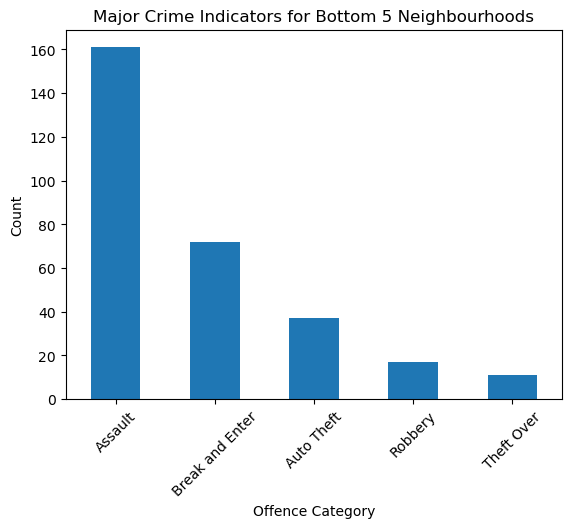

In [194]:
#Call mci_category function
mci_category(bottom_5, 'Bottom 5 Neighbourhoods')

In [195]:
#Call offence_pct function for assault and break and enter
offence_pct(bottom_5, 'Assault', 'Bottom 5 Neighbourhoods')
offence_pct(bottom_5, 'Break and Enter', 'Bottom 5 Neighbourhoods')

Assault offences accounted for 54.03% of all offences in Bottom 5 Neighbourhoods in 2018.
Break and Enter offences accounted for 24.16% of all offences in Bottom 5 Neighbourhoods in 2018.


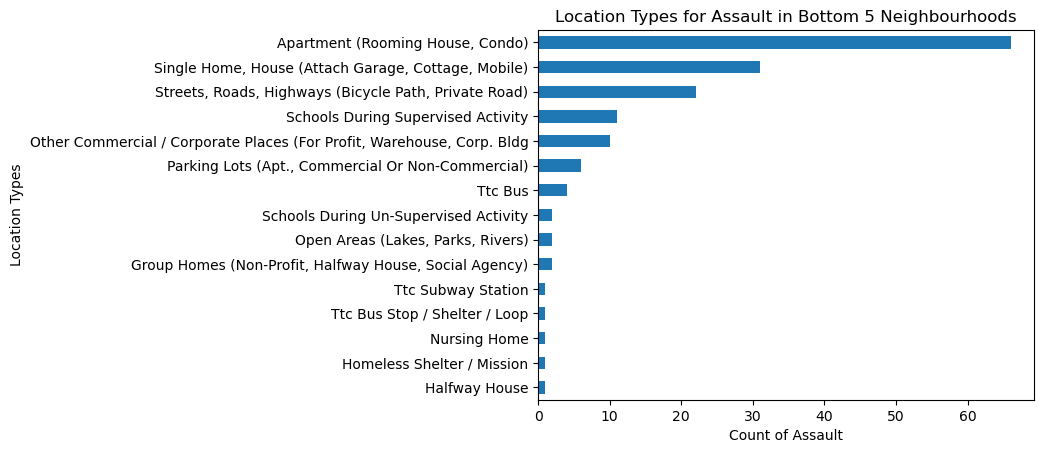

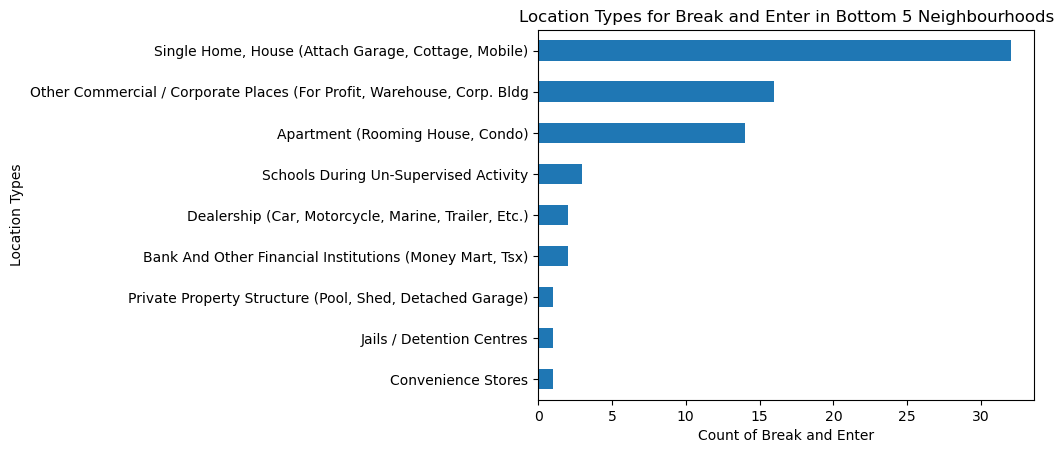

In [196]:
#Call off_location function for assault and break and enter
off_location(bottom_5, 'Assault', 'Bottom 5 Neighbourhoods')
off_location(bottom_5, 'Break and Enter', 'Bottom 5 Neighbourhoods')

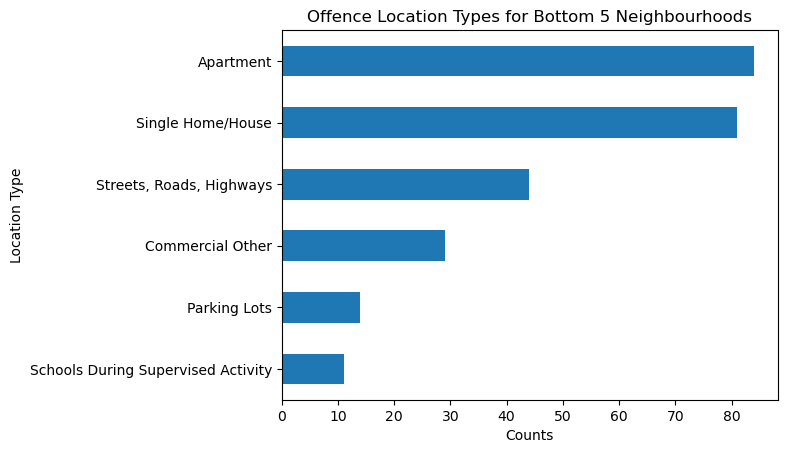

In [197]:
#Call location_types function
location_types(bottom_5, 'Bottom 5 Neighbourhoods')

In [198]:
#Call location_pct function for apartments and single homes/houses
location_pct(bottom_5, 'Single Home, House (Attach Garage, Cottage, Mobile)', 'Bottom 5 Neighbourhoods')
location_pct(bottom_5, 'Apartment (Rooming House, Condo)', 'Bottom 5 Neighbourhoods')

Offences in Single Home, House (Attach Garage, Cottage, Mobile) accounted for 27.18% of location types in Bottom 5 Neighbourhoods in 2018.
Offences in Apartment (Rooming House, Condo) accounted for 28.19% of location types in Bottom 5 Neighbourhoods in 2018.


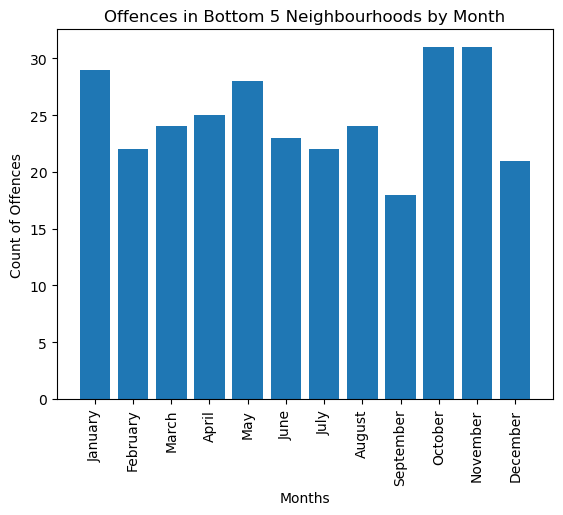

In [199]:
#Call monthly_offences function
monthly_offences(bottom_5, 'Bottom 5 Neighbourhoods')

In [200]:
#Call month_pct function for highest and lowest months
month_pct(bottom_5, 'January', 'Bottom 5 Neighbourhoods')
month_pct(bottom_5, 'October', 'Bottom 5 Neighbourhoods')
month_pct(bottom_5, 'November', 'Bottom 5 Neighbourhoods')
month_pct(bottom_5, 'September', 'Bottom 5 Neighbourhoods')
month_pct(bottom_5, 'December', 'Bottom 5 Neighbourhoods')

Offences in January accounted for 9.73% of all offences in Bottom 5 Neighbourhoods in 2018.
Offences in October accounted for 10.4% of all offences in Bottom 5 Neighbourhoods in 2018.
Offences in November accounted for 10.4% of all offences in Bottom 5 Neighbourhoods in 2018.
Offences in September accounted for 6.04% of all offences in Bottom 5 Neighbourhoods in 2018.
Offences in December accounted for 7.05% of all offences in Bottom 5 Neighbourhoods in 2018.


## 2018 Overall

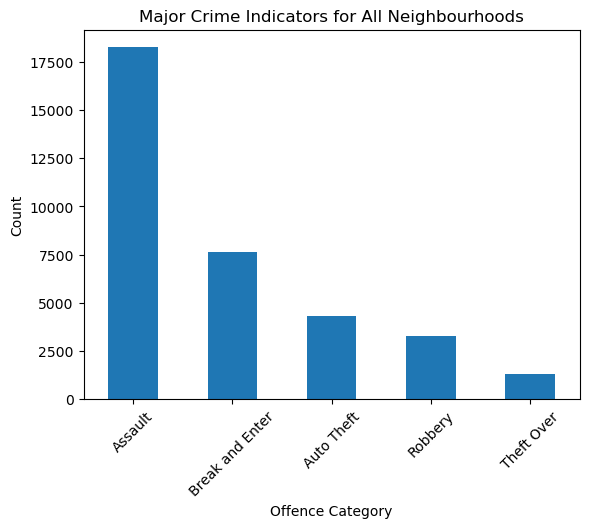

In [202]:
#Call mci_category function on mci_2018
mci_category(mci_2018, 'All Neighbourhoods')

In [203]:
#Call offence_pct function for assault
offence_pct(mci_2018, 'Assault', 'All Neighbourhoods')

Assault offences accounted for 52.5% of all offences in All Neighbourhoods in 2018.


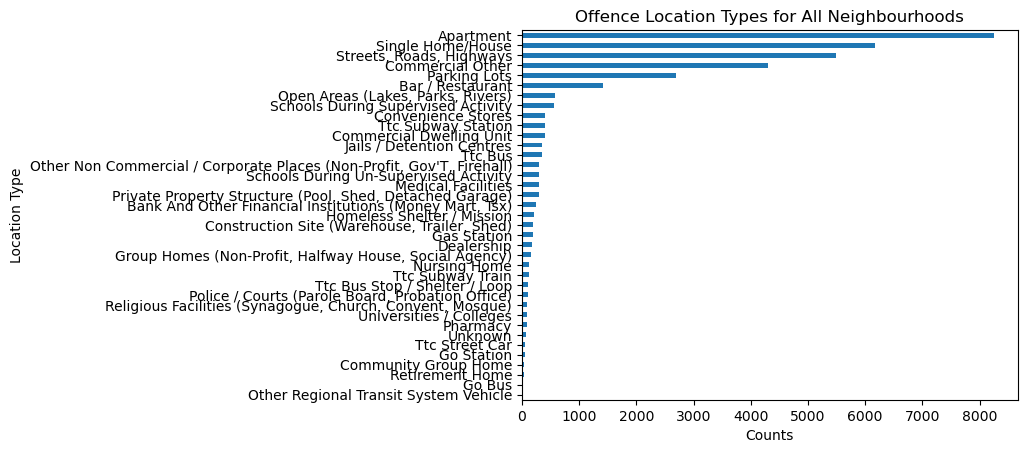

In [205]:
#Call location_types function
location_types(mci_2018, 'All Neighbourhoods')

In [206]:
#Call location_pct function for apartments, single homes/houses and streets/roads/highways
location_pct(mci_2018, 'Streets, Roads, Highways (Bicycle Path, Private Road)', 'all neighbourhoods')
location_pct(mci_2018, 'Single Home, House (Attach Garage, Cottage, Mobile)', 'all neighbourhoods')
location_pct(mci_2018, 'Apartment (Rooming House, Condo)', 'all neighbourhoods')

Offences in Streets, Roads, Highways (Bicycle Path, Private Road) accounted for 15.77% of location types in all neighbourhoods in 2018.
Offences in Single Home, House (Attach Garage, Cottage, Mobile) accounted for 17.72% of location types in all neighbourhoods in 2018.
Offences in Apartment (Rooming House, Condo) accounted for 23.74% of location types in all neighbourhoods in 2018.


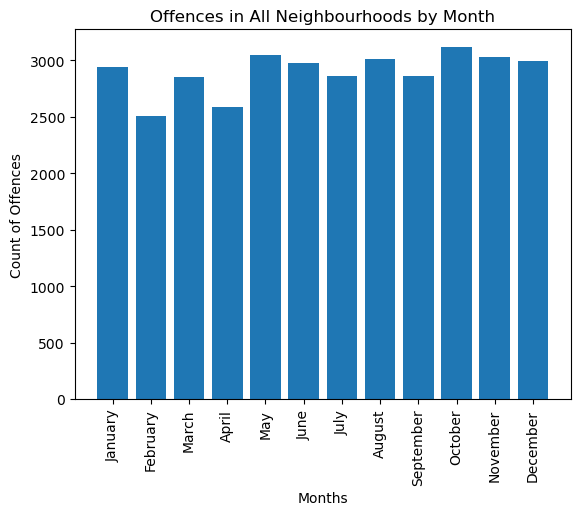

In [207]:
#Call monthly_offences function
monthly_offences(mci_2018, 'All Neighbourhoods')

In [208]:
#Call month_pct function on highest and lowest months
month_pct(mci_2018, 'May', 'all neighbourhoods')
month_pct(mci_2018, 'October', 'all neighbourhoods')
month_pct(mci_2018, 'November', 'all neighbourhoods')
month_pct(mci_2018, 'February', 'all neighbourhoods')
month_pct(mci_2018, 'April', 'all neighbourhoods')

Offences in May accounted for 8.75% of all offences in all neighbourhoods in 2018.
Offences in October accounted for 8.97% of all offences in all neighbourhoods in 2018.
Offences in November accounted for 8.72% of all offences in all neighbourhoods in 2018.
Offences in February accounted for 7.2% of all offences in all neighbourhoods in 2018.
Offences in April accounted for 7.45% of all offences in all neighbourhoods in 2018.
